In [1]:
import numpy as np 
import pandas as pd
import xarray as xr
import seaborn as sns
import matplotlib.pyplot as plt
from cdo import *
import os
import pymannkendall as mk
CDO = Cdo()

In [2]:
hours = [0,3,6,9,12,15,18,21]
h=['00','03','06','09','12','15','18','21']
path='../A_Stack_Yearwise/Stacks'
op_path = '../INDICES/RX_5day'
for year in range(1998,2020):
    i=0
    for hour in hours:
        # file = open(f'{path}/{year}/{year}_{hour}_stack.nc','r')
        CDO.etccdi_rx5day(input=f'{path}/{year}/{year}_{hour}_stack.nc',output=f'{op_path}/{year}/{year}_{h[i]}_rx5day.nc')
        i=i+1

In [3]:
max_5_day_prec = []
for year in range(1998,2020):
    data = xr.open_dataset(f'../INDICES/RX_5day/{year}/{year}_00_rx5day.nc')
    max_5_day_prec.append(data['rx5dayETCCDI'].values[0])
max_5_day_prec

[array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]], dtype=float32),
 array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]], dtype=float32),
 array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]], dtype=float32),
 array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [n

In [46]:
row=0
col=0
year=1
data_all_year_max_5_day_prec = []
plot_data=[]
mk_test_all_values=[]
all_values_for_max_5_day_prec_on_each_grid = []
for grids in max_5_day_prec[0]:
    col=0
    for grid_point in grids:
        data_all_year_max_5_day_prec = []
        # if(str(grid_point)!='nan'):
        data_all_year_max_5_day_prec.append(grid_point)
        for index in range(1,22):
            # if(str(max_5_day_prec[index][row][col])!='nan'):
            data_all_year_max_5_day_prec.append(max_5_day_prec[index][row][col])
        all_values_for_max_5_day_prec_on_each_grid.append(data_all_year_max_5_day_prec)
        try:
            op = mk.yue_wang_modification_test(data_all_year_max_5_day_prec) 
            mk_test_all_values.append(op)
            if(op.trend=='increasing'):
                plot_data.append(1)
            elif(op.trend=='no trend'):
                plot_data.append(0)
            else:
                plot_data.append(-1)
        except:
            plot_data.append(np.nan)
            mk_test_all_values.append(np.nan)
        col = col + 1
    row = row + 1

In [47]:
plot_data = np.array(plot_data).reshape(117,119)

In [48]:
max_5_day_prec_0_th_hour = xr.Dataset({
    "Max_5_Day_Precipitation_Yue_Wang_Results":(["lat","lon"],plot_data),
    # "Yue_Wang_test_values":(["x","y"],pd.DataFrame(mk_test_all_values))
},
coords={
    "lat":data['lat'].values,
    "lon":data['lon'].values,
    # "time": pd.date_range("2014-09-06", periods=3),
}
)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


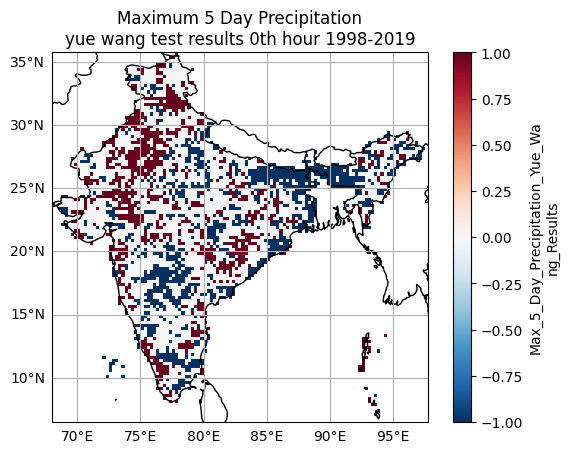

In [7]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import cartopy.feature

# Create a map using PlateCarree projection
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})

# Add map features
ax.coastlines()
ax.add_feature(cartopy.feature.BORDERS, linestyle='-')
gl = ax.gridlines(draw_labels=True)
gl.xlabels_top = False  
gl.ylabels_right = False 
gl.xlines = True 
gl.ylines = True 
lats = data['lat'].values
lons = data['lon'].values[:-2]
# ax.contourf(ds_21['Heavy_Precipitation_Yue_Wang_Results'])
# ds_21['Heavy_Precipitation_Yue_Wang_Results'].plot.contourf(cmap="coolwarm")
max_5_day_prec_0_th_hour['Max_5_Day_Precipitation_Yue_Wang_Results'].plot()

# ax.plot(lons,lats,color="#00000000")
# Plot data

# ax.scatter(lons, lats,transform=ccrs.PlateCarree())

# Customize and display the map
plt.title('Maximum 5 Day Precipitation\nyue wang test results 0th hour 1998-2019')
plt.show()
# turbo , coolwarm , coolwarm_r , bwr , bwr_r , 

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


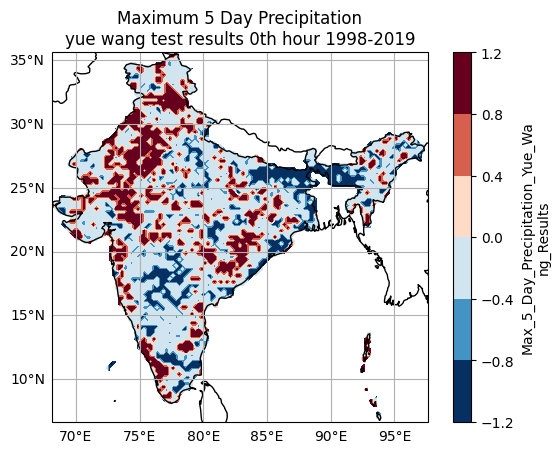

In [8]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import cartopy.feature

# Create a map using PlateCarree projection
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})

# Add map features
ax.coastlines()
ax.add_feature(cartopy.feature.BORDERS, linestyle='-')
gl = ax.gridlines(draw_labels=True)
gl.xlabels_top = False  
gl.ylabels_right = False 
gl.xlines = True 
gl.ylines = True 
lats = data['lat'].values
lons = data['lon'].values[:-2]
# ax.contourf(ds_21['Heavy_Precipitation_Yue_Wang_Results'])
# ds_21['Heavy_Precipitation_Yue_Wang_Results'].plot.contourf(cmap="coolwarm")
max_5_day_prec_0_th_hour['Max_5_Day_Precipitation_Yue_Wang_Results'].plot.contourf()

# ax.plot(lons,lats,color="#00000000")
# Plot data

# ax.scatter(lons, lats,transform=ccrs.PlateCarree())

# Customize and display the map
plt.title('Maximum 5 Day Precipitation\nyue wang test results 0th hour 1998-2019')
plt.show()
# turbo , coolwarm , coolwarm_r , bwr , bwr_r , 

## 3rd Hour

In [9]:
max_5_day_prec = []
for year in range(1998,2020):
    data = xr.open_dataset(f'../INDICES/RX_5day/{year}/{year}_03_rx5day.nc')
    max_5_day_prec.append(data['rx5dayETCCDI'].values[0])
max_5_day_prec

[array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]], dtype=float32),
 array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]], dtype=float32),
 array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]], dtype=float32),
 array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [n

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


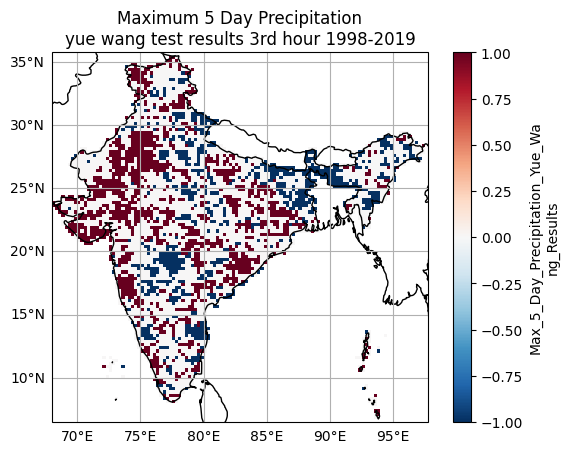

In [13]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import cartopy.feature

# Create a map using PlateCarree projection
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})

# Add map features
ax.coastlines()
ax.add_feature(cartopy.feature.BORDERS, linestyle='-')
gl = ax.gridlines(draw_labels=True)
gl.xlabels_top = False  
gl.ylabels_right = False 
gl.xlines = True 
gl.ylines = True 
lats = data['lat'].values
lons = data['lon'].values[:-2]
# ax.contourf(ds_21['Heavy_Precipitation_Yue_Wang_Results'])
# ds_21['Heavy_Precipitation_Yue_Wang_Results'].plot.contourf(cmap="coolwarm")
max_5_day_prec_0_th_hour['Max_5_Day_Precipitation_Yue_Wang_Results'].plot()

# ax.plot(lons,lats,color="#00000000")
# Plot data

# ax.scatter(lons, lats,transform=ccrs.PlateCarree())

# Customize and display the map
plt.title('Maximum 5 Day Precipitation\nyue wang test results 3rd hour 1998-2019')
plt.show()
# turbo , coolwarm , coolwarm_r , bwr , bwr_r , 

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


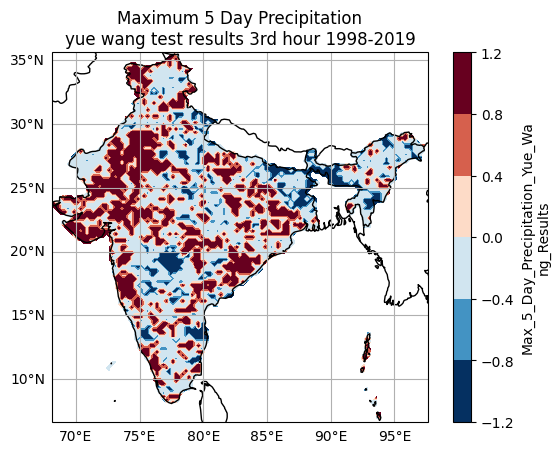

In [14]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import cartopy.feature

# Create a map using PlateCarree projection
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})

# Add map features
ax.coastlines()
ax.add_feature(cartopy.feature.BORDERS, linestyle='-')
gl = ax.gridlines(draw_labels=True)
gl.xlabels_top = False  
gl.ylabels_right = False 
gl.xlines = True 
gl.ylines = True 
lats = data['lat'].values
lons = data['lon'].values[:-2]
# ax.contourf(ds_21['Heavy_Precipitation_Yue_Wang_Results'])
# ds_21['Heavy_Precipitation_Yue_Wang_Results'].plot.contourf(cmap="coolwarm")
max_5_day_prec_0_th_hour['Max_5_Day_Precipitation_Yue_Wang_Results'].plot.contourf()

# ax.plot(lons,lats,color="#00000000")
# Plot data

# ax.scatter(lons, lats,transform=ccrs.PlateCarree())

# Customize and display the map
plt.title('Maximum 5 Day Precipitation\nyue wang test results 3rd hour 1998-2019')
plt.show()
# turbo , coolwarm , coolwarm_r , bwr , bwr_r , 

## 6th Hour

In [15]:
max_5_day_prec = []
for year in range(1998,2020):
    data = xr.open_dataset(f'../INDICES/RX_5day/{year}/{year}_06_rx5day.nc')
    max_5_day_prec.append(data['rx5dayETCCDI'].values[0])
max_5_day_prec

[array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]], dtype=float32),
 array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]], dtype=float32),
 array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]], dtype=float32),
 array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [n

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


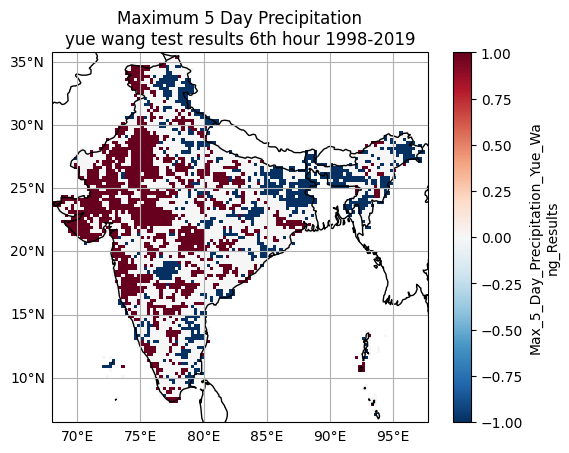

In [19]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import cartopy.feature

# Create a map using PlateCarree projection
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})

# Add map features
ax.coastlines()
ax.add_feature(cartopy.feature.BORDERS, linestyle='-')
gl = ax.gridlines(draw_labels=True)
gl.xlabels_top = False  
gl.ylabels_right = False 
gl.xlines = True 
gl.ylines = True 
lats = data['lat'].values
lons = data['lon'].values[:-2]
# ax.contourf(ds_21['Heavy_Precipitation_Yue_Wang_Results'])
# ds_21['Heavy_Precipitation_Yue_Wang_Results'].plot.contourf(cmap="coolwarm")
max_5_day_prec_0_th_hour['Max_5_Day_Precipitation_Yue_Wang_Results'].plot()

# ax.plot(lons,lats,color="#00000000")
# Plot data

# ax.scatter(lons, lats,transform=ccrs.PlateCarree())

# Customize and display the map
plt.title('Maximum 5 Day Precipitation\nyue wang test results 6th hour 1998-2019')
plt.show()
# turbo , coolwarm , coolwarm_r , bwr , bwr_r , 

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


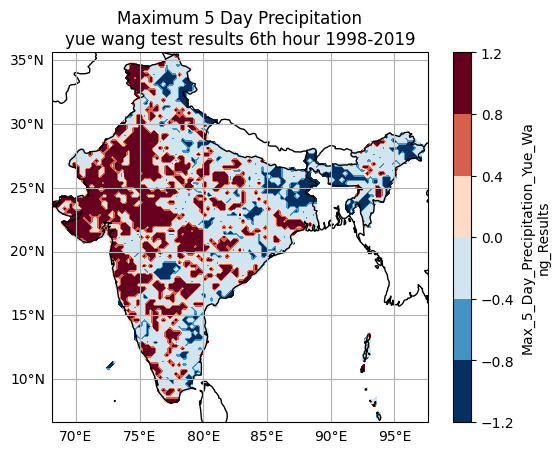

In [20]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import cartopy.feature

# Create a map using PlateCarree projection
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})

# Add map features
ax.coastlines()
ax.add_feature(cartopy.feature.BORDERS, linestyle='-')
gl = ax.gridlines(draw_labels=True)
gl.xlabels_top = False  
gl.ylabels_right = False 
gl.xlines = True 
gl.ylines = True 
lats = data['lat'].values
lons = data['lon'].values[:-2]
# ax.contourf(ds_21['Heavy_Precipitation_Yue_Wang_Results'])
# ds_21['Heavy_Precipitation_Yue_Wang_Results'].plot.contourf(cmap="coolwarm")
max_5_day_prec_0_th_hour['Max_5_Day_Precipitation_Yue_Wang_Results'].plot.contourf()

# ax.plot(lons,lats,color="#00000000")
# Plot data

# ax.scatter(lons, lats,transform=ccrs.PlateCarree())

# Customize and display the map
plt.title('Maximum 5 Day Precipitation\nyue wang test results 6th hour 1998-2019')
plt.show()
# turbo , coolwarm , coolwarm_r , bwr , bwr_r , 

## 9th Hour

In [21]:
max_5_day_prec = []
for year in range(1998,2020):
    data = xr.open_dataset(f'../INDICES/RX_5day/{year}/{year}_09_rx5day.nc')
    max_5_day_prec.append(data['rx5dayETCCDI'].values[0])
max_5_day_prec

[array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]], dtype=float32),
 array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]], dtype=float32),
 array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]], dtype=float32),
 array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [n

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


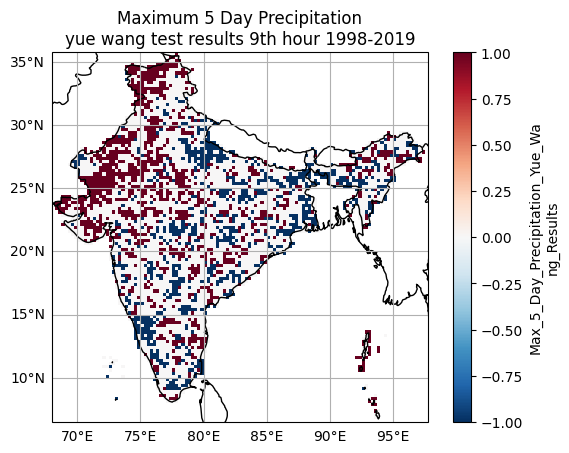

In [25]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import cartopy.feature

# Create a map using PlateCarree projection
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})

# Add map features
ax.coastlines()
ax.add_feature(cartopy.feature.BORDERS, linestyle='-')
gl = ax.gridlines(draw_labels=True)
gl.xlabels_top = False  
gl.ylabels_right = False 
gl.xlines = True 
gl.ylines = True 
lats = data['lat'].values
lons = data['lon'].values[:-2]
# ax.contourf(ds_21['Heavy_Precipitation_Yue_Wang_Results'])
# ds_21['Heavy_Precipitation_Yue_Wang_Results'].plot.contourf(cmap="coolwarm")
max_5_day_prec_0_th_hour['Max_5_Day_Precipitation_Yue_Wang_Results'].plot()

# ax.plot(lons,lats,color="#00000000")
# Plot data

# ax.scatter(lons, lats,transform=ccrs.PlateCarree())

# Customize and display the map
plt.title('Maximum 5 Day Precipitation\nyue wang test results 9th hour 1998-2019')
plt.show()
# turbo , coolwarm , coolwarm_r , bwr , bwr_r , 

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


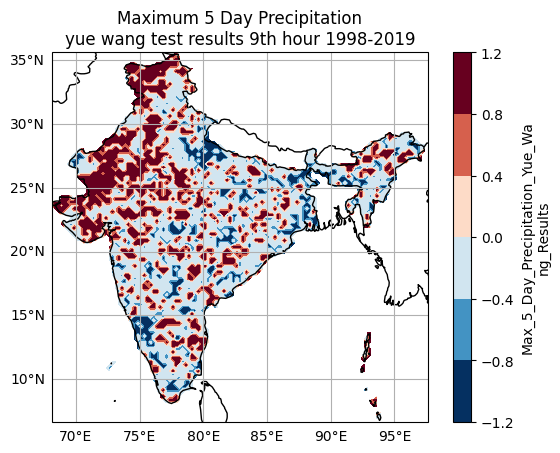

In [26]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import cartopy.feature

# Create a map using PlateCarree projection
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})

# Add map features
ax.coastlines()
ax.add_feature(cartopy.feature.BORDERS, linestyle='-')
gl = ax.gridlines(draw_labels=True)
gl.xlabels_top = False  
gl.ylabels_right = False 
gl.xlines = True 
gl.ylines = True 
lats = data['lat'].values
lons = data['lon'].values[:-2]
# ax.contourf(ds_21['Heavy_Precipitation_Yue_Wang_Results'])
# ds_21['Heavy_Precipitation_Yue_Wang_Results'].plot.contourf(cmap="coolwarm")
max_5_day_prec_0_th_hour['Max_5_Day_Precipitation_Yue_Wang_Results'].plot.contourf()

# ax.plot(lons,lats,color="#00000000")
# Plot data

# ax.scatter(lons, lats,transform=ccrs.PlateCarree())

# Customize and display the map
plt.title('Maximum 5 Day Precipitation\nyue wang test results 9th hour 1998-2019')
plt.show()
# turbo , coolwarm , coolwarm_r , bwr , bwr_r , 

## 12th Hour

In [27]:
max_5_day_prec = []
for year in range(1998,2020):
    data = xr.open_dataset(f'../INDICES/RX_5day/{year}/{year}_12_rx5day.nc')
    max_5_day_prec.append(data['rx5dayETCCDI'].values[0])
max_5_day_prec

[array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]], dtype=float32),
 array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]], dtype=float32),
 array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]], dtype=float32),
 array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [n

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


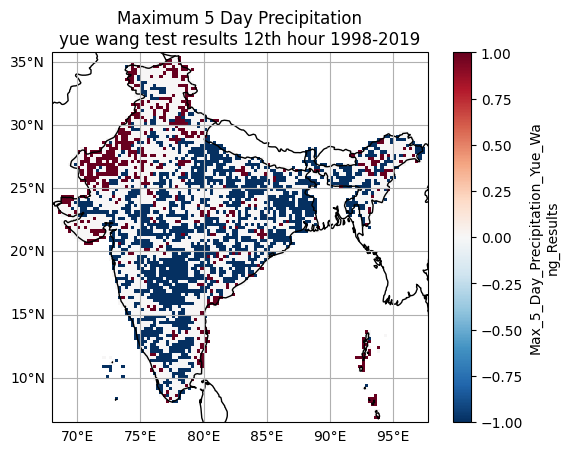

In [31]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import cartopy.feature

# Create a map using PlateCarree projection
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})

# Add map features
ax.coastlines()
ax.add_feature(cartopy.feature.BORDERS, linestyle='-')
gl = ax.gridlines(draw_labels=True)
gl.xlabels_top = False  
gl.ylabels_right = False 
gl.xlines = True 
gl.ylines = True 
lats = data['lat'].values
lons = data['lon'].values[:-2]
# ax.contourf(ds_21['Heavy_Precipitation_Yue_Wang_Results'])
# ds_21['Heavy_Precipitation_Yue_Wang_Results'].plot.contourf(cmap="coolwarm")
max_5_day_prec_0_th_hour['Max_5_Day_Precipitation_Yue_Wang_Results'].plot()

# ax.plot(lons,lats,color="#00000000")
# Plot data

# ax.scatter(lons, lats,transform=ccrs.PlateCarree())

# Customize and display the map
plt.title('Maximum 5 Day Precipitation\nyue wang test results 12th hour 1998-2019')
plt.show()
# turbo , coolwarm , coolwarm_r , bwr , bwr_r , 

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


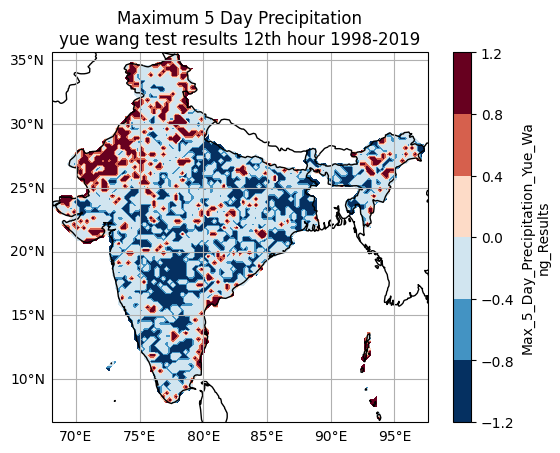

In [32]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import cartopy.feature

# Create a map using PlateCarree projection
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})

# Add map features
ax.coastlines()
ax.add_feature(cartopy.feature.BORDERS, linestyle='-')
gl = ax.gridlines(draw_labels=True)
gl.xlabels_top = False  
gl.ylabels_right = False 
gl.xlines = True 
gl.ylines = True 
lats = data['lat'].values
lons = data['lon'].values[:-2]
# ax.contourf(ds_21['Heavy_Precipitation_Yue_Wang_Results'])
# ds_21['Heavy_Precipitation_Yue_Wang_Results'].plot.contourf(cmap="coolwarm")
max_5_day_prec_0_th_hour['Max_5_Day_Precipitation_Yue_Wang_Results'].plot.contourf()

# ax.plot(lons,lats,color="#00000000")
# Plot data

# ax.scatter(lons, lats,transform=ccrs.PlateCarree())

# Customize and display the map
plt.title('Maximum 5 Day Precipitation\nyue wang test results 12th hour 1998-2019')
plt.show()
# turbo , coolwarm , coolwarm_r , bwr , bwr_r , 

## 15th Hour

In [33]:
max_5_day_prec = []
for year in range(1998,2020):
    data = xr.open_dataset(f'../INDICES/RX_5day/{year}/{year}_15_rx5day.nc')
    max_5_day_prec.append(data['rx5dayETCCDI'].values[0])
max_5_day_prec

[array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]], dtype=float32),
 array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]], dtype=float32),
 array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]], dtype=float32),
 array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [n

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


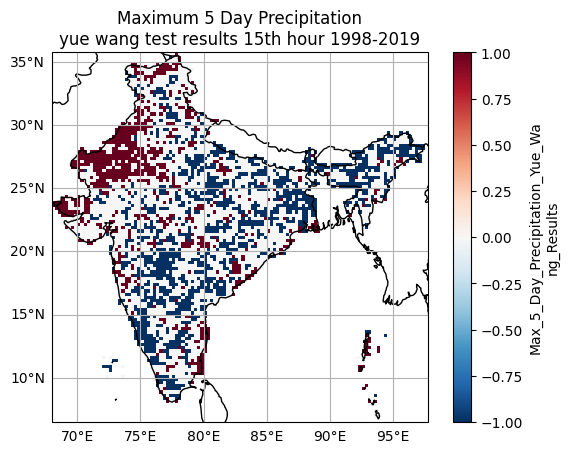

In [37]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import cartopy.feature

# Create a map using PlateCarree projection
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})

# Add map features
ax.coastlines()
ax.add_feature(cartopy.feature.BORDERS, linestyle='-')
gl = ax.gridlines(draw_labels=True)
gl.xlabels_top = False  
gl.ylabels_right = False 
gl.xlines = True 
gl.ylines = True 
lats = data['lat'].values
lons = data['lon'].values[:-2]
# ax.contourf(ds_21['Heavy_Precipitation_Yue_Wang_Results'])
# ds_21['Heavy_Precipitation_Yue_Wang_Results'].plot.contourf(cmap="coolwarm")
max_5_day_prec_0_th_hour['Max_5_Day_Precipitation_Yue_Wang_Results'].plot()

# ax.plot(lons,lats,color="#00000000")
# Plot data

# ax.scatter(lons, lats,transform=ccrs.PlateCarree())

# Customize and display the map
plt.title('Maximum 5 Day Precipitation\nyue wang test results 15th hour 1998-2019')
plt.show()
# turbo , coolwarm , coolwarm_r , bwr , bwr_r , 

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


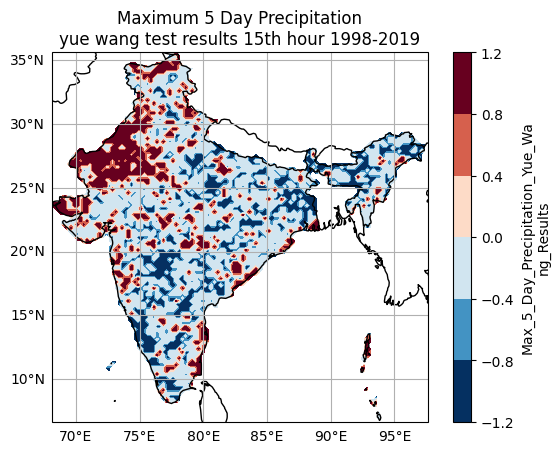

In [38]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import cartopy.feature

# Create a map using PlateCarree projection
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})

# Add map features
ax.coastlines()
ax.add_feature(cartopy.feature.BORDERS, linestyle='-')
gl = ax.gridlines(draw_labels=True)
gl.xlabels_top = False  
gl.ylabels_right = False 
gl.xlines = True 
gl.ylines = True 
lats = data['lat'].values
lons = data['lon'].values[:-2]
# ax.contourf(ds_21['Heavy_Precipitation_Yue_Wang_Results'])
# ds_21['Heavy_Precipitation_Yue_Wang_Results'].plot.contourf(cmap="coolwarm")
max_5_day_prec_0_th_hour['Max_5_Day_Precipitation_Yue_Wang_Results'].plot.contourf()

# ax.plot(lons,lats,color="#00000000")
# Plot data

# ax.scatter(lons, lats,transform=ccrs.PlateCarree())

# Customize and display the map
plt.title('Maximum 5 Day Precipitation\nyue wang test results 15th hour 1998-2019')
plt.show()
# turbo , coolwarm , coolwarm_r , bwr , bwr_r , 

## 18th Hour

In [39]:
max_5_day_prec = []
for year in range(1998,2020):
    data = xr.open_dataset(f'../INDICES/RX_5day/{year}/{year}_18_rx5day.nc')
    max_5_day_prec.append(data['rx5dayETCCDI'].values[0])
max_5_day_prec

[array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]], dtype=float32),
 array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]], dtype=float32),
 array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]], dtype=float32),
 array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [n

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


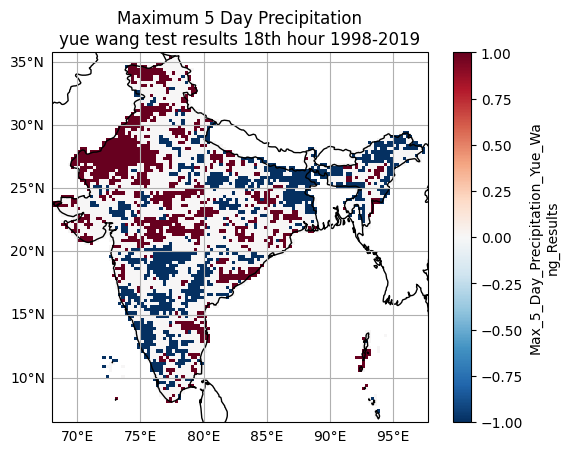

In [43]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import cartopy.feature

# Create a map using PlateCarree projection
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})

# Add map features
ax.coastlines()
ax.add_feature(cartopy.feature.BORDERS, linestyle='-')
gl = ax.gridlines(draw_labels=True)
gl.xlabels_top = False  
gl.ylabels_right = False 
gl.xlines = True 
gl.ylines = True 
lats = data['lat'].values
lons = data['lon'].values[:-2]
# ax.contourf(ds_21['Heavy_Precipitation_Yue_Wang_Results'])
# ds_21['Heavy_Precipitation_Yue_Wang_Results'].plot.contourf(cmap="coolwarm")
max_5_day_prec_0_th_hour['Max_5_Day_Precipitation_Yue_Wang_Results'].plot()

# ax.plot(lons,lats,color="#00000000")
# Plot data

# ax.scatter(lons, lats,transform=ccrs.PlateCarree())

# Customize and display the map
plt.title('Maximum 5 Day Precipitation\nyue wang test results 18th hour 1998-2019')
plt.show()
# turbo , coolwarm , coolwarm_r , bwr , bwr_r , 

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


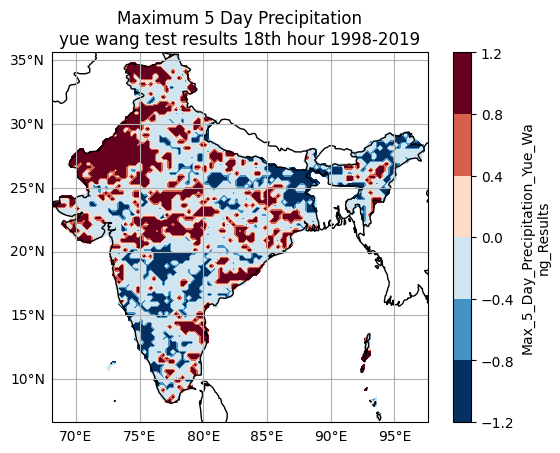

In [44]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import cartopy.feature

# Create a map using PlateCarree projection
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})

# Add map features
ax.coastlines()
ax.add_feature(cartopy.feature.BORDERS, linestyle='-')
gl = ax.gridlines(draw_labels=True)
gl.xlabels_top = False  
gl.ylabels_right = False 
gl.xlines = True 
gl.ylines = True 
lats = data['lat'].values
lons = data['lon'].values[:-2]
# ax.contourf(ds_21['Heavy_Precipitation_Yue_Wang_Results'])
# ds_21['Heavy_Precipitation_Yue_Wang_Results'].plot.contourf(cmap="coolwarm")
max_5_day_prec_0_th_hour['Max_5_Day_Precipitation_Yue_Wang_Results'].plot.contourf()

# ax.plot(lons,lats,color="#00000000")
# Plot data

# ax.scatter(lons, lats,transform=ccrs.PlateCarree())

# Customize and display the map
plt.title('Maximum 5 Day Precipitation\nyue wang test results 18th hour 1998-2019')
plt.show()
# turbo , coolwarm , coolwarm_r , bwr , bwr_r , 

## 21st Hour

In [45]:
max_5_day_prec = []
for year in range(1998,2020):
    data = xr.open_dataset(f'../INDICES/RX_5day/{year}/{year}_21_rx5day.nc')
    max_5_day_prec.append(data['rx5dayETCCDI'].values[0])
max_5_day_prec

[array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]], dtype=float32),
 array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]], dtype=float32),
 array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]], dtype=float32),
 array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [n

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


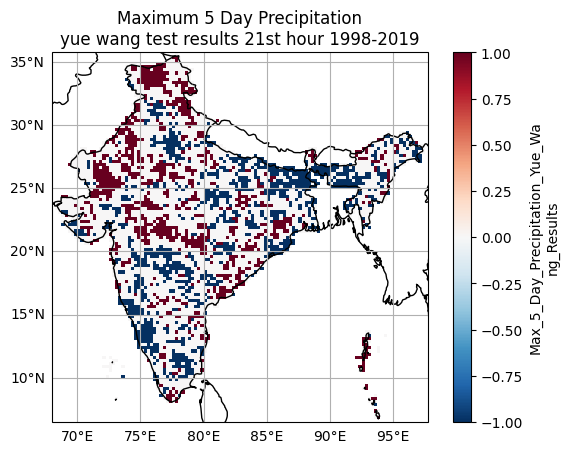

In [49]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import cartopy.feature

# Create a map using PlateCarree projection
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})

# Add map features
ax.coastlines()
ax.add_feature(cartopy.feature.BORDERS, linestyle='-')
gl = ax.gridlines(draw_labels=True)
gl.xlabels_top = False  
gl.ylabels_right = False 
gl.xlines = True 
gl.ylines = True 
lats = data['lat'].values
lons = data['lon'].values[:-2]
# ax.contourf(ds_21['Heavy_Precipitation_Yue_Wang_Results'])
# ds_21['Heavy_Precipitation_Yue_Wang_Results'].plot.contourf(cmap="coolwarm")
max_5_day_prec_0_th_hour['Max_5_Day_Precipitation_Yue_Wang_Results'].plot()

# ax.plot(lons,lats,color="#00000000")
# Plot data

# ax.scatter(lons, lats,transform=ccrs.PlateCarree())

# Customize and display the map
plt.title('Maximum 5 Day Precipitation\nyue wang test results 21st hour 1998-2019')
plt.show()
# turbo , coolwarm , coolwarm_r , bwr , bwr_r , 

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


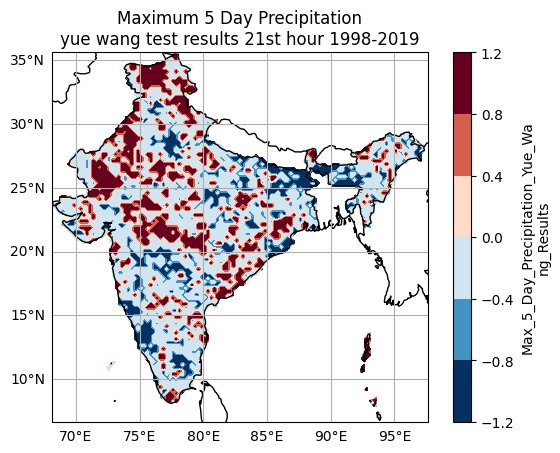

In [50]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import cartopy.feature

# Create a map using PlateCarree projection
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})

# Add map features
ax.coastlines()
ax.add_feature(cartopy.feature.BORDERS, linestyle='-')
gl = ax.gridlines(draw_labels=True)
gl.xlabels_top = False  
gl.ylabels_right = False 
gl.xlines = True 
gl.ylines = True 
lats = data['lat'].values
lons = data['lon'].values[:-2]
# ax.contourf(ds_21['Heavy_Precipitation_Yue_Wang_Results'])
# ds_21['Heavy_Precipitation_Yue_Wang_Results'].plot.contourf(cmap="coolwarm")
max_5_day_prec_0_th_hour['Max_5_Day_Precipitation_Yue_Wang_Results'].plot.contourf()

# ax.plot(lons,lats,color="#00000000")
# Plot data

# ax.scatter(lons, lats,transform=ccrs.PlateCarree())

# Customize and display the map
plt.title('Maximum 5 Day Precipitation\nyue wang test results 21st hour 1998-2019')
plt.show()
# turbo , coolwarm , coolwarm_r , bwr , bwr_r , 

## Mann Kendall Test

Done with the newly defined rx5day files 

In [6]:
hour = ["00","03","06","09","12","15","18","21"]
path = '../INDICES/RX_5day/'
for year in range(1998,2020):
    for h in hour:
        os.rename(f'{path}{year}_{h}_rx5day.nc',f'{path}{year}/{year}_{h}_rx5day.nc')

In [2]:
def SenSlope(max_1_day_prec):
    row=0
    col=0
    count=[]
    data_all_year_max_1_day_prec = []
    plot_data=[]
    intercept_plot=[]
    mk_test_all_values=[]
    all_values_for_max_1_day_prec_on_each_grid = []
    for grids in max_1_day_prec[0]:
        col=0
        for grid_point in grids:
            data_all_year_max_1_day_prec = []
            # if(str(grid_point)!='nan'):
            data_all_year_max_1_day_prec.append(grid_point)
            for index in range(1,len(max_1_day_prec)):
                # if(str(max_1_day_prec[index][row][col])!='nan'):
                data_all_year_max_1_day_prec.append(max_1_day_prec[index][row][col])
            all_values_for_max_1_day_prec_on_each_grid.append(data_all_year_max_1_day_prec)
            try:
                slope,intercept = mk.sens_slope(data_all_year_max_1_day_prec) 
                plot_data.append(slope)
                intercept_plot.append(intercept)
                count.append(slope)
            except:
                plot_data.append(np.nan)
                intercept_plot.append(np.nan)
                mk_test_all_values.append(np.nan)
            col = col + 1
        row = row + 1
    plot_data = np.array(plot_data).reshape(117,119)
    intercept_plot = np.array(intercept_plot).reshape(117,119)
    plot_data = xr.Dataset({
    "RX_5_Day_Man_Kendall_Results":(["lat","lon"],plot_data),
    # "Yue_Wang_test_values":(["x","y"],pd.DataFrame(mk_test_all_values))
},
coords={
    "lat":data['lat'].values,
    "lon":data['lon'].values,
    # "time": pd.date_range("2014-09-06", periods=3),
}
)
    
    intercept_plot = xr.Dataset({
    "RX_5_Day_Man_Kendall_Results":(["lat","lon"],intercept_plot),
    # "Yue_Wang_test_values":(["x","y"],pd.DataFrame(mk_test_all_values))
},
coords={
    "lat":data['lat'].values,
    "lon":data['lon'].values,
    # "time": pd.date_range("2014-09-06", periods=3),
}
)
    return plot_data,intercept_plot,count

In [3]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import cartopy.feature
def PlotGraph(plot_data,test="Men Kendall",hour="0th",cmap=""):
    # Create a map using PlateCarree projection
    fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})

    # Add map features
    ax.coastlines()
    ax.add_feature(cartopy.feature.BORDERS, linestyle='-')
    gl = ax.gridlines(draw_labels=True)
    gl.xlabels_top = False  
    gl.ylabels_right = False 
    gl.xlines = True 
    gl.ylines = True 
    
    # ax.contourf(ds_21['Heavy_Precipitation_Yue_Wang_Results'])
    # ds_21['Heavy_Precipitation_Yue_Wang_Results'].plot.contourf(cmap="coolwarm")
    if cmap != "":
        plot_data['RX_5_Day_Man_Kendall_Results'].plot(cmap=cmap)
    else:
        plot_data['RX_5_Day_Man_Kendall_Results'].plot(cmap="seismic_r")
    # ax.plot(lons,lats,color="#00000000")
    # Plot data

    # ax.scatter(lons, lats,transform=ccrs.PlateCarree())

    # Customize and display the map
    plt.title(f'Max 5 Day Precipitation\n{test} results {hour} hour 1998-2019')
    plt.show()
    # turbo , coolwarm , coolwarm_r , bwr , bwr_r , 

In [4]:
def ManKendallTest(max_1_day_prec):
    row=0
    col=0
    year=1
    data_all_year_max_1_day_prec = []
    plot_data=[]
    mk_test_all_values=[]
    all_values_for_max_1_day_prec_on_each_grid = []
    for grids in max_1_day_prec[0]:
        col=0
        for grid_point in grids:
            data_all_year_max_1_day_prec = []
            # if(str(grid_point)!='nan'):
            data_all_year_max_1_day_prec.append(grid_point)
            for index in range(1,22):
                # if(str(max_1_day_prec[index][row][col])!='nan'):
                data_all_year_max_1_day_prec.append(max_1_day_prec[index][row][col])
            all_values_for_max_1_day_prec_on_each_grid.append(data_all_year_max_1_day_prec)
            try:
                op = mk.original_test(data_all_year_max_1_day_prec) 
                mk_test_all_values.append(op)
                # plot_data.append(op.h)
                if(op.trend=='increasing'):
                    plot_data.append(1)
                elif(op.trend=='no trend'):
                    plot_data.append(0)
                else:
                    plot_data.append(-1)
            except:
                plot_data.append(np.nan)
                mk_test_all_values.append(np.nan)
            col = col + 1
        row = row + 1
    plot_data = np.array(plot_data).reshape(117,119)
    plot_data = xr.Dataset({
    "RX_5_Day_Man_Kendall_Results":(["lat","lon"],plot_data),
    # "Yue_Wang_test_values":(["x","y"],pd.DataFrame(mk_test_all_values))
},
coords={
    "lat":data['lat'].values,
    "lon":data['lon'].values,
    # "time": pd.date_range("2014-09-06", periods=3),
}
)
    return plot_data

In [5]:
def LoadData(hour):
    max_5_day_prec = []
    for year in range(1998,2020):
        data = xr.open_dataset(f'../INDICES/RX_5day/{year}/{year}_{hour}_rx5day.nc')
        max_5_day_prec.append(data['rx5dayETCCDI'].values[0])
    return max_5_day_prec

In [5]:
increasing_count = []
decreasing_count = []

In [6]:
def CountGrids(count):
    p=0
    n=0 
    nn=0
    o=0
    for i in count:
        if i>0:
            p=p+1
        elif i<0:
            n=n+1
        elif i==0:
            o=o+1
        elif str(i)=='nan':
            nn=nn+1
    increasing_count.append(p)
    decreasing_count.append(-n)
    print(f'p={p},n={-n},nn={nn},o={o}\nTotal = {p+n+nn+o}')

In [13]:
def GridPlot(increasing_count,decreasing_count,year='1998-2019'):
    x = [0,3,6,9,12,15,18,21]
    fig = plt.figure()
    ax = plt.subplot(111)
    plt.xticks(x)
    ax.bar(x, increasing_count, width=0.7, color='b')
    ax.bar(x, decreasing_count, width=0.7, color='r')
    plt.xlabel("Hours")
    plt.ylabel("Number of Grids")
    plt.title(f"Total Increasing and Decreasing Grids for Max 5 Day Precipitation {year}")
    plt.legend({'Increasing':'blue','Decreasing':'red'})

In [6]:
data = xr.open_dataset(f'../INDICES/RX_5day/1998/1998_00_rx5day.nc')

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xarray/coding/times.py:724: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xarray/core/indexing.py:557: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  array = array.get_duck_array()


## 0th Hour

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xarray/coding/times.py:724: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xarray/core/indexing.py:557: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  array = array.get_duck_array()
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xarray/coding/times.py:724: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/Lib

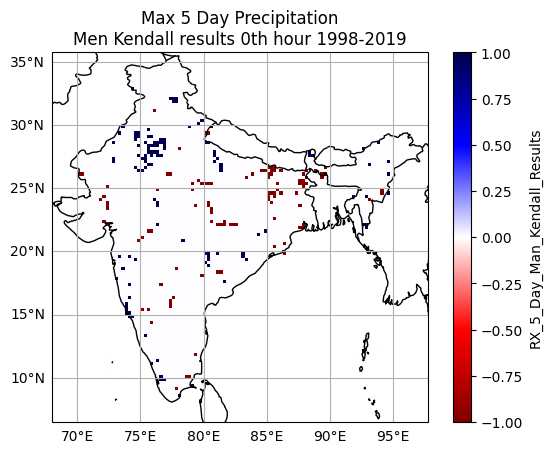

In [7]:
max_5_day_prec = LoadData("00")
# max_5_day_prec

plot_data = ManKendallTest(max_5_day_prec)

PlotGraph(plot_data)

/Users/yuvrajsinhdilipsinhbodana/Library/Python/3.11/lib/python/site-packages/pymannkendall/pymannkendall.py:180: RuntimeWarning: All-NaN slice encountered
  slope = np.nanmedian(__sens_estimator(x))
/Users/yuvrajsinhdilipsinhbodana/Library/Python/3.11/lib/python/site-packages/pymannkendall/pymannkendall.py:181: RuntimeWarning: All-NaN slice encountered
  intercept = np.nanmedian(x) - np.median(np.arange(n)[~np.isnan(x.flatten())]) * slope  # or median(x) - (n-1)/2 *slope
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:451: UserWarni

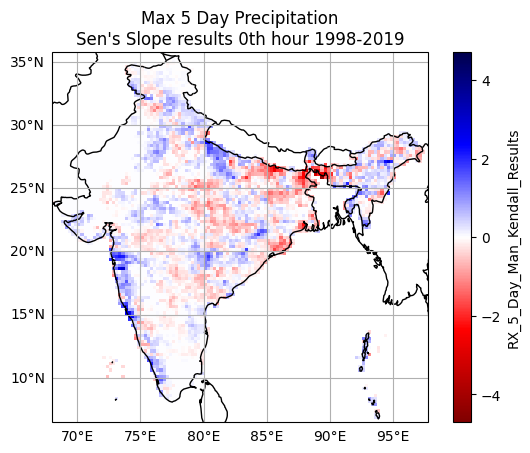

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


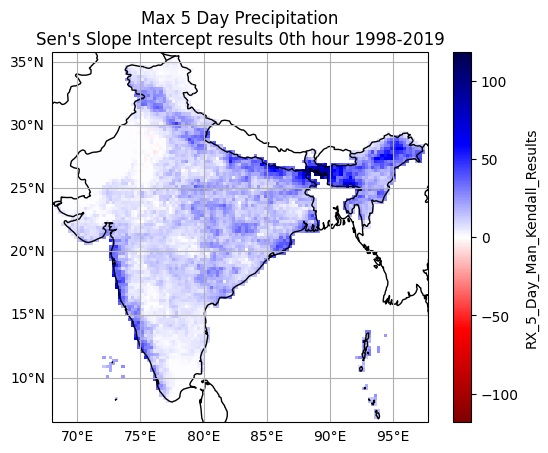

In [8]:
plot_data,intercept_plot = SenSlope(max_5_day_prec)

PlotGraph(plot_data,test="Sen\'s Slope")

PlotGraph(intercept_plot,test="Sen\'s Slope Intercept")

## 3rd Hour

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xarray/coding/times.py:724: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xarray/core/indexing.py:557: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  array = array.get_duck_array()
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xarray/coding/times.py:724: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/Lib

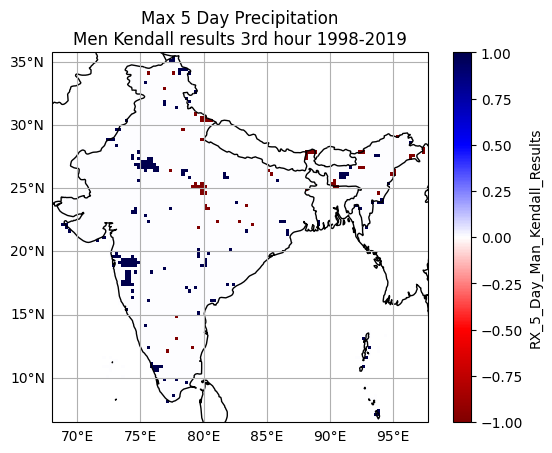

In [12]:
max_5_day_prec = LoadData("03")
# max_5_day_prec

plot_data = ManKendallTest(max_5_day_prec)

PlotGraph(plot_data,hour="3rd")

/Users/yuvrajsinhdilipsinhbodana/Library/Python/3.11/lib/python/site-packages/pymannkendall/pymannkendall.py:180: RuntimeWarning: All-NaN slice encountered
  slope = np.nanmedian(__sens_estimator(x))
/Users/yuvrajsinhdilipsinhbodana/Library/Python/3.11/lib/python/site-packages/pymannkendall/pymannkendall.py:181: RuntimeWarning: All-NaN slice encountered
  intercept = np.nanmedian(x) - np.median(np.arange(n)[~np.isnan(x.flatten())]) * slope  # or median(x) - (n-1)/2 *slope
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:451: UserWarni

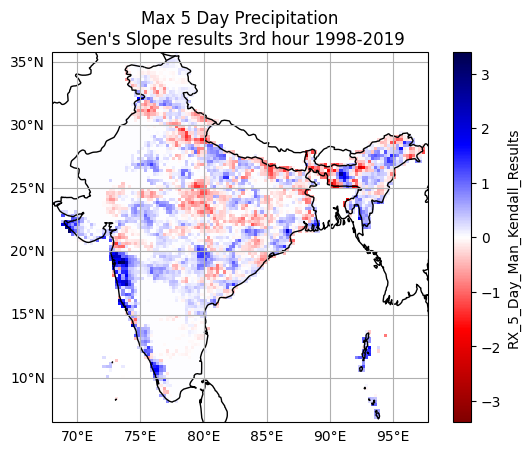

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


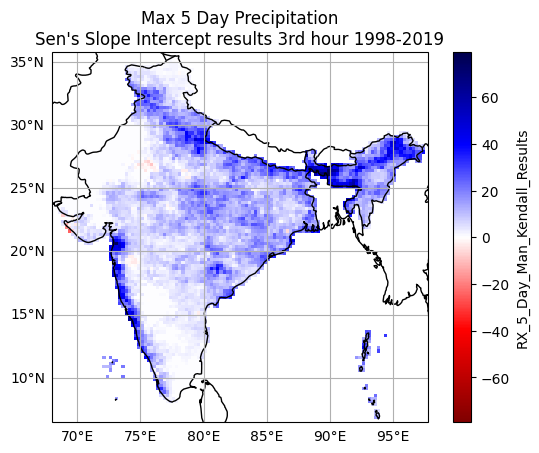

In [13]:
plot_data,intercept_plot = SenSlope(max_5_day_prec)

PlotGraph(plot_data,test="Sen\'s Slope",hour="3rd")

PlotGraph(intercept_plot,test="Sen\'s Slope Intercept",hour="3rd")

## 6th Hour

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xarray/coding/times.py:724: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xarray/core/indexing.py:557: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  array = array.get_duck_array()
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xarray/coding/times.py:724: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/Lib

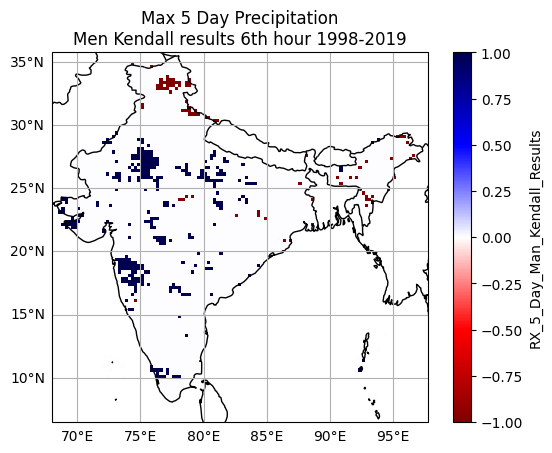

In [14]:
max_5_day_prec = LoadData("06")
# max_5_day_prec

plot_data = ManKendallTest(max_5_day_prec)

PlotGraph(plot_data,hour="6th")

/Users/yuvrajsinhdilipsinhbodana/Library/Python/3.11/lib/python/site-packages/pymannkendall/pymannkendall.py:180: RuntimeWarning: All-NaN slice encountered
  slope = np.nanmedian(__sens_estimator(x))
/Users/yuvrajsinhdilipsinhbodana/Library/Python/3.11/lib/python/site-packages/pymannkendall/pymannkendall.py:181: RuntimeWarning: All-NaN slice encountered
  intercept = np.nanmedian(x) - np.median(np.arange(n)[~np.isnan(x.flatten())]) * slope  # or median(x) - (n-1)/2 *slope
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:451: UserWarni

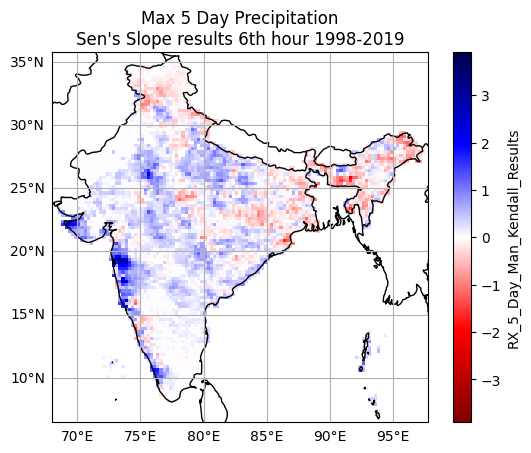

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


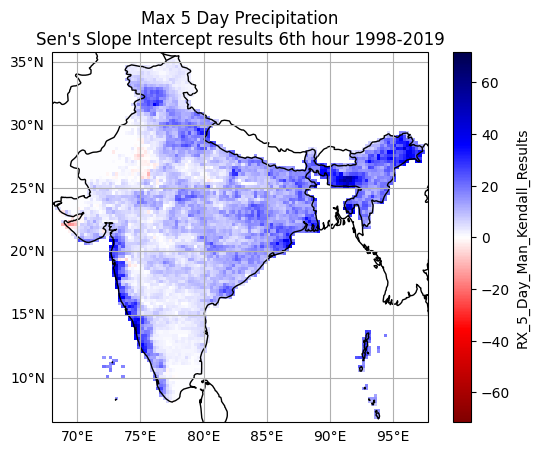

In [15]:
plot_data,intercept_plot = SenSlope(max_5_day_prec)

PlotGraph(plot_data,test="Sen\'s Slope",hour="6th")

PlotGraph(intercept_plot,test="Sen\'s Slope Intercept",hour="6th")

## 9th Hour

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xarray/coding/times.py:724: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xarray/core/indexing.py:557: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  array = array.get_duck_array()
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xarray/coding/times.py:724: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/Lib

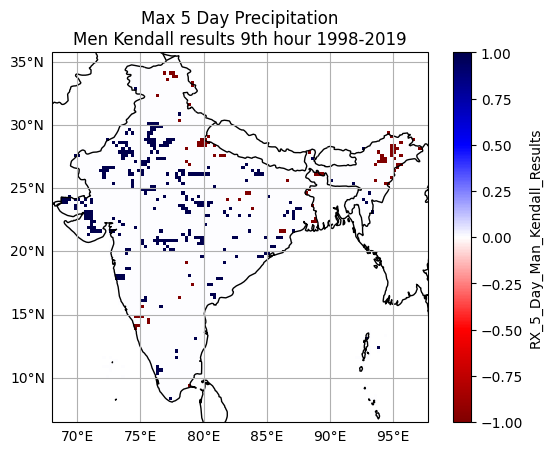

In [16]:
very_heavy_prec = LoadData("09")
plot_data = ManKendallTest(very_heavy_prec)
PlotGraph(plot_data,hour="9th")

/Users/yuvrajsinhdilipsinhbodana/Library/Python/3.11/lib/python/site-packages/pymannkendall/pymannkendall.py:180: RuntimeWarning: All-NaN slice encountered
  slope = np.nanmedian(__sens_estimator(x))
/Users/yuvrajsinhdilipsinhbodana/Library/Python/3.11/lib/python/site-packages/pymannkendall/pymannkendall.py:181: RuntimeWarning: All-NaN slice encountered
  intercept = np.nanmedian(x) - np.median(np.arange(n)[~np.isnan(x.flatten())]) * slope  # or median(x) - (n-1)/2 *slope
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:451: UserWarni

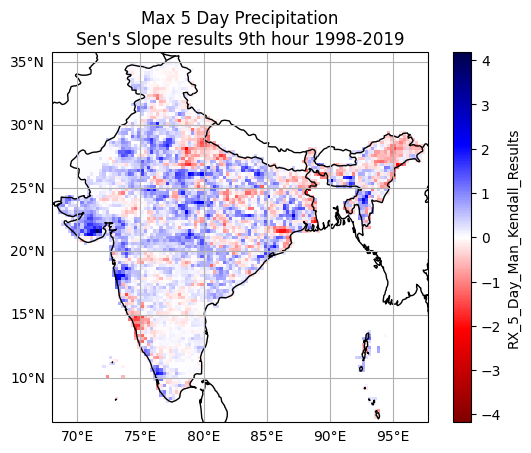

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


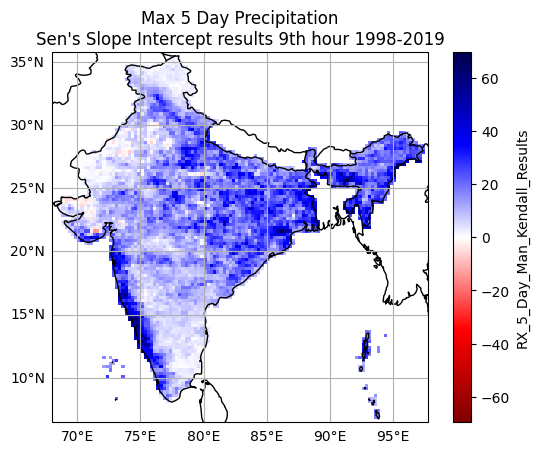

In [17]:
plot_data,intercept_plot = SenSlope(very_heavy_prec)

PlotGraph(plot_data,test="Sen\'s Slope",hour="9th")

PlotGraph(intercept_plot,test="Sen\'s Slope Intercept",hour="9th")

## 12th Hour

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xarray/coding/times.py:724: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xarray/core/indexing.py:557: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  array = array.get_duck_array()
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xarray/coding/times.py:724: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/Lib

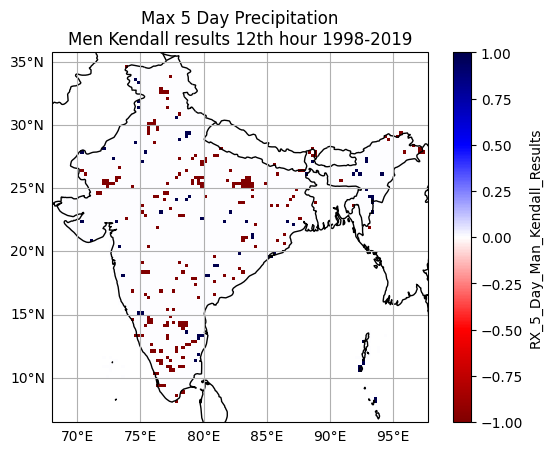

In [18]:
very_heavy_prec = LoadData("12")
plot_data = ManKendallTest(very_heavy_prec)
PlotGraph(plot_data,hour="12th")

/Users/yuvrajsinhdilipsinhbodana/Library/Python/3.11/lib/python/site-packages/pymannkendall/pymannkendall.py:180: RuntimeWarning: All-NaN slice encountered
  slope = np.nanmedian(__sens_estimator(x))
/Users/yuvrajsinhdilipsinhbodana/Library/Python/3.11/lib/python/site-packages/pymannkendall/pymannkendall.py:181: RuntimeWarning: All-NaN slice encountered
  intercept = np.nanmedian(x) - np.median(np.arange(n)[~np.isnan(x.flatten())]) * slope  # or median(x) - (n-1)/2 *slope
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:451: UserWarni

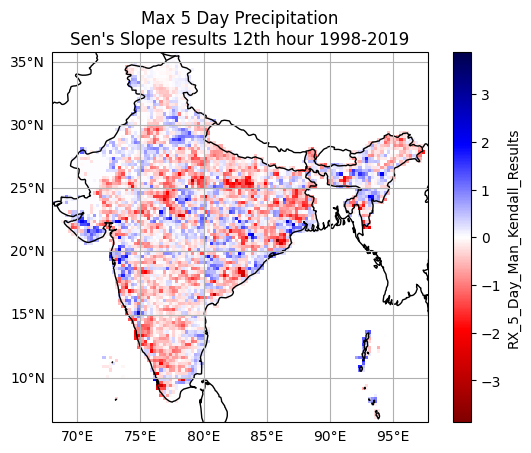

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


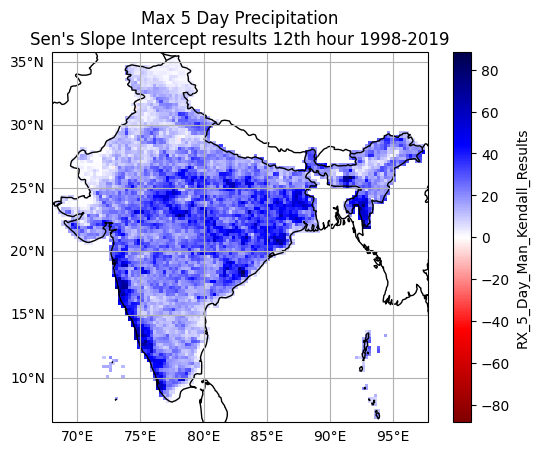

In [19]:
plot_data,intercept_plot = SenSlope(very_heavy_prec)

PlotGraph(plot_data,test="Sen\'s Slope",hour="12th")

PlotGraph(intercept_plot,test="Sen\'s Slope Intercept",hour="12th")

## 15th Hour

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xarray/coding/times.py:724: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xarray/core/indexing.py:557: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  array = array.get_duck_array()
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xarray/coding/times.py:724: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/Lib

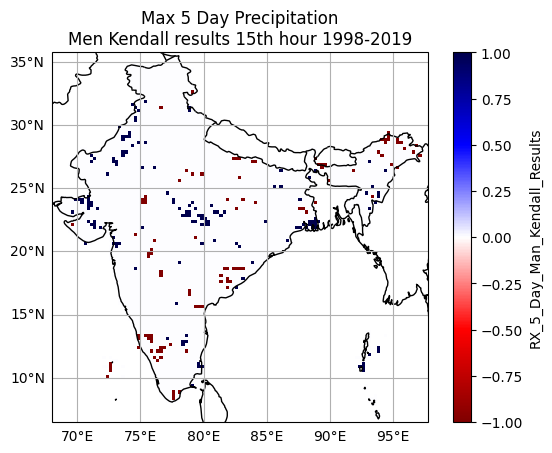

In [20]:
very_heavy_prec = LoadData("15")
plot_data = ManKendallTest(very_heavy_prec)
PlotGraph(plot_data,hour="15th")

/Users/yuvrajsinhdilipsinhbodana/Library/Python/3.11/lib/python/site-packages/pymannkendall/pymannkendall.py:180: RuntimeWarning: All-NaN slice encountered
  slope = np.nanmedian(__sens_estimator(x))
/Users/yuvrajsinhdilipsinhbodana/Library/Python/3.11/lib/python/site-packages/pymannkendall/pymannkendall.py:181: RuntimeWarning: All-NaN slice encountered
  intercept = np.nanmedian(x) - np.median(np.arange(n)[~np.isnan(x.flatten())]) * slope  # or median(x) - (n-1)/2 *slope
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:451: UserWarni

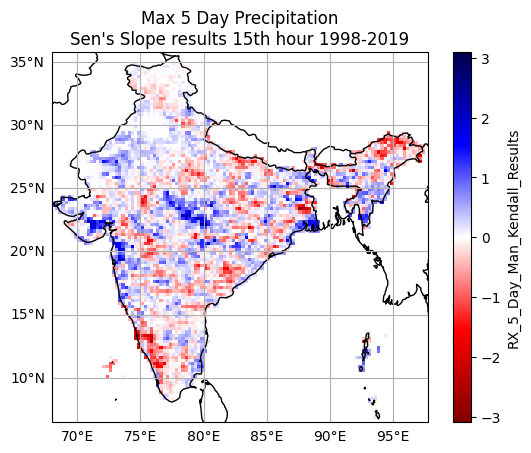

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


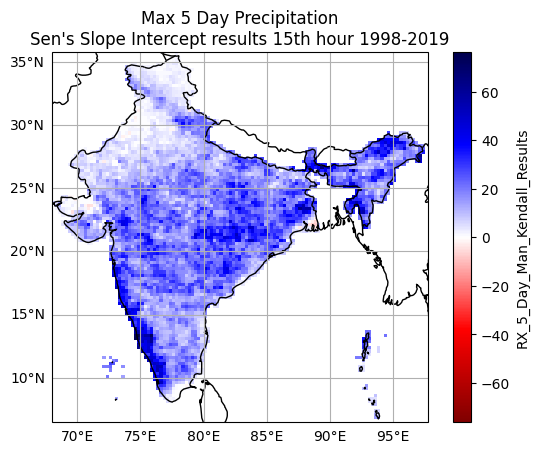

In [21]:
plot_data,intercept_plot = SenSlope(very_heavy_prec)
PlotGraph(plot_data,test="Sen\'s Slope",hour="15th")
PlotGraph(intercept_plot,test="Sen\'s Slope Intercept",hour="15th")

## 18th Hour

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xarray/coding/times.py:724: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xarray/core/indexing.py:557: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  array = array.get_duck_array()
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xarray/coding/times.py:724: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/Lib

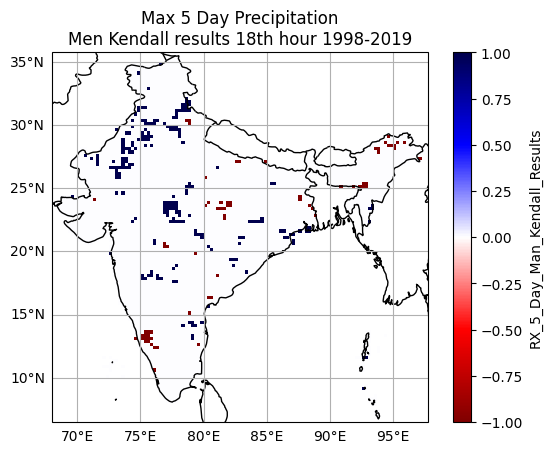

In [22]:
very_heavy_prec = LoadData("18")
plot_data = ManKendallTest(very_heavy_prec)
PlotGraph(plot_data,hour="18th")

/Users/yuvrajsinhdilipsinhbodana/Library/Python/3.11/lib/python/site-packages/pymannkendall/pymannkendall.py:180: RuntimeWarning: All-NaN slice encountered
  slope = np.nanmedian(__sens_estimator(x))
/Users/yuvrajsinhdilipsinhbodana/Library/Python/3.11/lib/python/site-packages/pymannkendall/pymannkendall.py:181: RuntimeWarning: All-NaN slice encountered
  intercept = np.nanmedian(x) - np.median(np.arange(n)[~np.isnan(x.flatten())]) * slope  # or median(x) - (n-1)/2 *slope
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:451: UserWarni

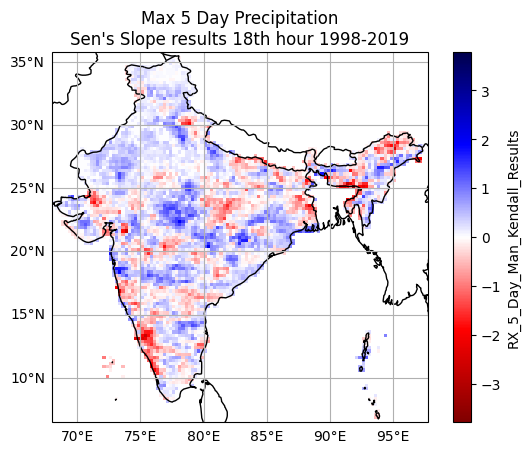

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


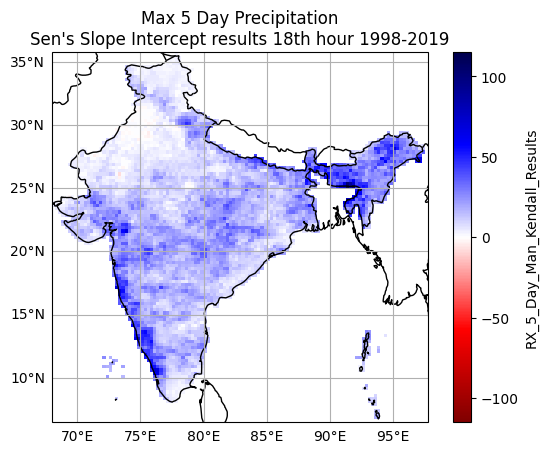

In [23]:
plot_data,intercept_plot = SenSlope(very_heavy_prec)
PlotGraph(plot_data,test="Sen\'s Slope",hour="18th")
PlotGraph(intercept_plot,test="Sen\'s Slope Intercept",hour="18th")

## 21st Hour

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xarray/coding/times.py:724: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xarray/core/indexing.py:557: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  array = array.get_duck_array()
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xarray/coding/times.py:724: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/Lib

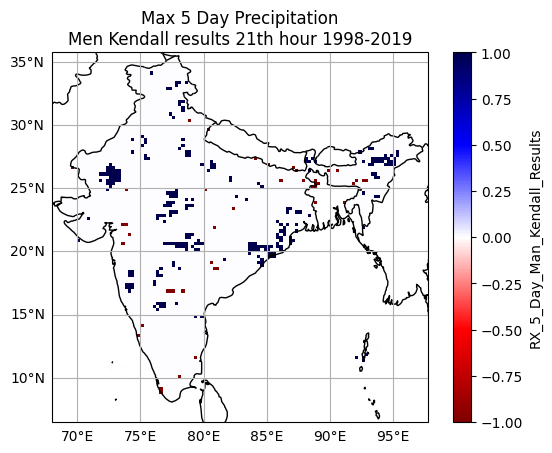

In [24]:
very_heavy_prec = LoadData("21")
plot_data = ManKendallTest(very_heavy_prec)
PlotGraph(plot_data,hour="21th")

/Users/yuvrajsinhdilipsinhbodana/Library/Python/3.11/lib/python/site-packages/pymannkendall/pymannkendall.py:180: RuntimeWarning: All-NaN slice encountered
  slope = np.nanmedian(__sens_estimator(x))
/Users/yuvrajsinhdilipsinhbodana/Library/Python/3.11/lib/python/site-packages/pymannkendall/pymannkendall.py:181: RuntimeWarning: All-NaN slice encountered
  intercept = np.nanmedian(x) - np.median(np.arange(n)[~np.isnan(x.flatten())]) * slope  # or median(x) - (n-1)/2 *slope
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:451: UserWarni

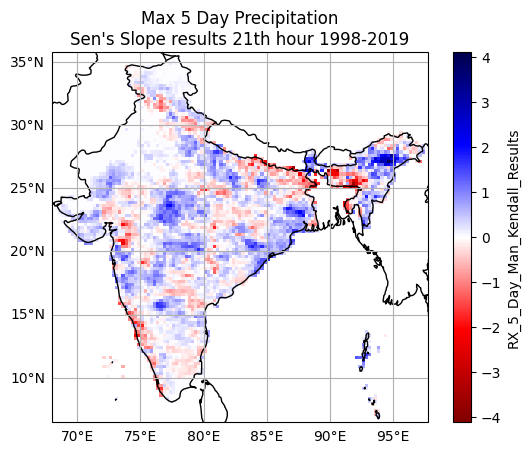

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


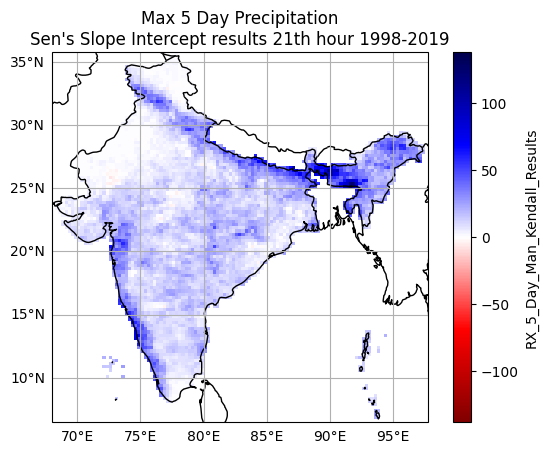

In [25]:
plot_data,intercept_plot = SenSlope(very_heavy_prec)
PlotGraph(plot_data,test="Sen\'s Slope",hour="21th")
PlotGraph(intercept_plot,test="Sen\'s Slope Intercept",hour="21th")

## GPM Original Resolution

In [9]:
data = xr.open_dataset('../GPM_Original_Res_Stacks/RX_5day/2020_00_rx5day.nc')
data['rx5dayETCCDI']

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xarray/coding/times.py:724: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xarray/core/indexing.py:557: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  array = array.get_duck_array()


<xarray.DataArray 'rx5dayETCCDI' (time: 1, lat: 289, lon: 294)>
[84966 values with dtype=float32]
Coordinates:
  * time     (time) object 0000-07-02 00:00:00
  * lon      (lon) float32 68.15 68.25 68.35 68.45 ... 97.15 97.25 97.35 97.45
  * lat      (lat) float32 6.75 6.85 6.95 7.05 7.15 ... 35.25 35.35 35.45 35.55
Attributes:
    long_name:  Maximum Consecutive 5-day Precipitation
    units:      mm

In [2]:
def SenSlope(max_1_day_prec):
    row=0
    col=0
    count=[]
    data_all_year_max_1_day_prec = []
    plot_data=[]
    intercept_plot=[]
    mk_test_all_values=[]
    all_values_for_max_1_day_prec_on_each_grid = []
    for grids in max_1_day_prec[0]:
        col=0
        for grid_point in grids:
            data_all_year_max_1_day_prec = []
            # if(str(grid_point)!='nan'):
            data_all_year_max_1_day_prec.append(grid_point)
            for index in range(1,len(max_1_day_prec)):
                # if(str(max_1_day_prec[index][row][col])!='nan'):
                data_all_year_max_1_day_prec.append(max_1_day_prec[index][row][col])
            all_values_for_max_1_day_prec_on_each_grid.append(data_all_year_max_1_day_prec)
            try:
                slope,intercept = mk.sens_slope(data_all_year_max_1_day_prec) 
                plot_data.append(slope)
                intercept_plot.append(intercept)
                count.append(slope)
            except:
                plot_data.append(np.nan)
                intercept_plot.append(np.nan)
                mk_test_all_values.append(np.nan)
            col = col + 1
        row = row + 1
    plot_data = np.array(plot_data).reshape(289,294)
    intercept_plot = np.array(intercept_plot).reshape(289,294)
    plot_data = xr.Dataset({
    "RX_5_Day_Man_Kendall_Results":(["lat","lon"],plot_data),
    # "Yue_Wang_test_values":(["x","y"],pd.DataFrame(mk_test_all_values))
},
coords={
    "lat":data['lat'].values,
    "lon":data['lon'].values,
    # "time": pd.date_range("2014-09-06", periods=3),
}
)
    
    intercept_plot = xr.Dataset({
    "RX_5_Day_Man_Kendall_Results":(["lat","lon"],intercept_plot),
    # "Yue_Wang_test_values":(["x","y"],pd.DataFrame(mk_test_all_values))
},
coords={
    "lat":data['lat'].values,
    "lon":data['lon'].values,
    # "time": pd.date_range("2014-09-06", periods=3),
}
)
    return plot_data,intercept_plot,count

In [3]:
def ManKendallTest(max_5_day_prec):
    row=0
    col=0
    year=1
    data_all_year_max_5_day_prec = []
    plot_data=[]
    mk_test_all_values=[]
    all_values_for_max_5_day_prec_on_each_grid = []
    for grids in max_5_day_prec[0]:
        col=0
        for grid_point in grids:
            data_all_year_max_5_day_prec = []
            # if(str(grid_point)!='nan'):
            data_all_year_max_5_day_prec.append(grid_point) # 2020 value
            for index in range(1,len(max_5_day_prec)):
                # if(str(max_5_day_prec[index][row][col])!='nan'):
                data_all_year_max_5_day_prec.append(max_5_day_prec[index][row][col]) # 2021,2022,2023
            all_values_for_max_5_day_prec_on_each_grid.append(data_all_year_max_5_day_prec)
            try:
                op = mk.original_test(data_all_year_max_5_day_prec,alpha=0.2) 
                mk_test_all_values.append(op)
                # plot_data.append(op.h)
                if(op.trend=='increasing'):
                    plot_data.append(1)
                elif(op.trend=='no trend'):
                    plot_data.append(0)
                else:
                    plot_data.append(-1)
            except:
                plot_data.append(np.nan)
                mk_test_all_values.append(np.nan)
            col = col + 1
        row = row + 1
    plot_data = np.array(plot_data).reshape(289,294)
    plot_data = xr.Dataset({
    "RX_5_Day_Man_Kendall_Results":(["lat","lon"],plot_data),
    # "Yue_Wang_test_values":(["x","y"],pd.DataFrame(mk_test_all_values))
},
coords={
    "lat":data['lat'].values,
    "lon":data['lon'].values,
    # "time": pd.date_range("2014-09-06", periods=3),
}
)
    return plot_data

In [4]:
def LoadData(hour):
    max_5_day_prec = []
    for year in range(2020,2024):
        data = xr.open_dataset(f'../GPM_Original_Res_Stacks/RX_5day/{year}_{hour}_rx5day.nc')
        max_5_day_prec.append(data['rx5dayETCCDI'].values[0])
    return max_5_day_prec

## 0th Hour

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xarray/coding/times.py:724: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xarray/core/indexing.py:557: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  array = array.get_duck_array()
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xarray/coding/times.py:724: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/Lib

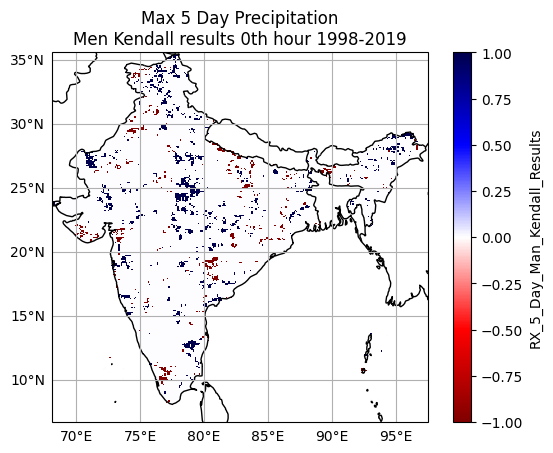

In [12]:
max_5_day_prec = LoadData("00")
plot_data = ManKendallTest(max_5_day_prec)
PlotGraph(plot_data)

/Users/yuvrajsinhdilipsinhbodana/Library/Python/3.11/lib/python/site-packages/pymannkendall/pymannkendall.py:180: RuntimeWarning: All-NaN slice encountered
  slope = np.nanmedian(__sens_estimator(x))
/Users/yuvrajsinhdilipsinhbodana/Library/Python/3.11/lib/python/site-packages/pymannkendall/pymannkendall.py:181: RuntimeWarning: All-NaN slice encountered
  intercept = np.nanmedian(x) - np.median(np.arange(n)[~np.isnan(x.flatten())]) * slope  # or median(x) - (n-1)/2 *slope
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:451: UserWarni

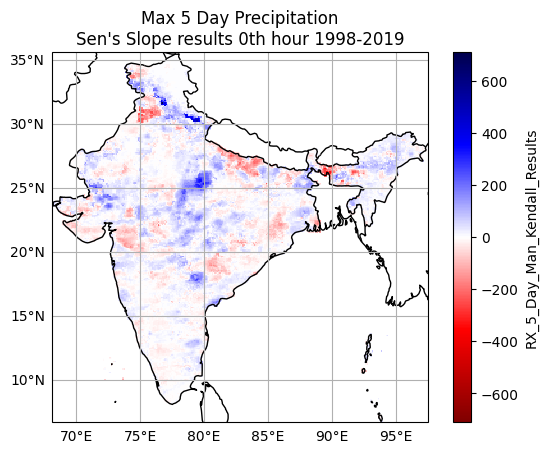

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


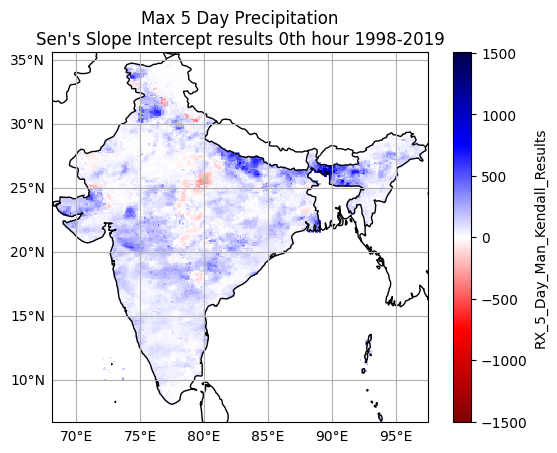

In [13]:
plot_data,intercept_plot = SenSlope(max_5_day_prec)
PlotGraph(plot_data,test="Sen\'s Slope")
PlotGraph(intercept_plot,test="Sen\'s Slope Intercept")

## 3rd Hour

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xarray/coding/times.py:724: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xarray/core/indexing.py:557: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  array = array.get_duck_array()
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xarray/coding/times.py:724: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/Lib

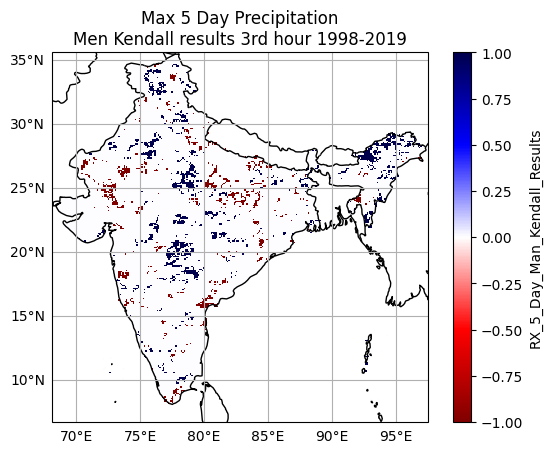

In [14]:
max_5_day_prec = LoadData("03")
plot_data = ManKendallTest(max_5_day_prec)
PlotGraph(plot_data,hour="3rd")

/Users/yuvrajsinhdilipsinhbodana/Library/Python/3.11/lib/python/site-packages/pymannkendall/pymannkendall.py:180: RuntimeWarning: All-NaN slice encountered
  slope = np.nanmedian(__sens_estimator(x))
/Users/yuvrajsinhdilipsinhbodana/Library/Python/3.11/lib/python/site-packages/pymannkendall/pymannkendall.py:181: RuntimeWarning: All-NaN slice encountered
  intercept = np.nanmedian(x) - np.median(np.arange(n)[~np.isnan(x.flatten())]) * slope  # or median(x) - (n-1)/2 *slope
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:451: UserWarni

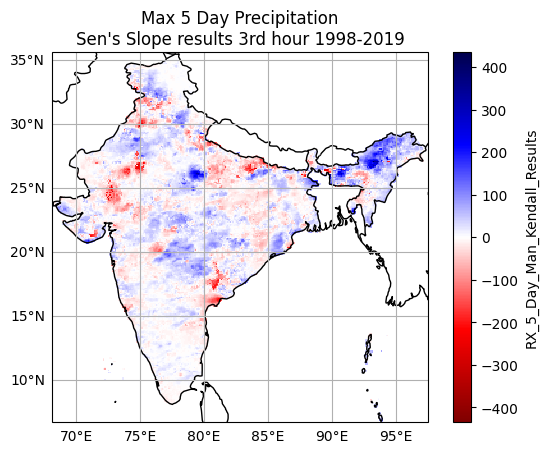

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


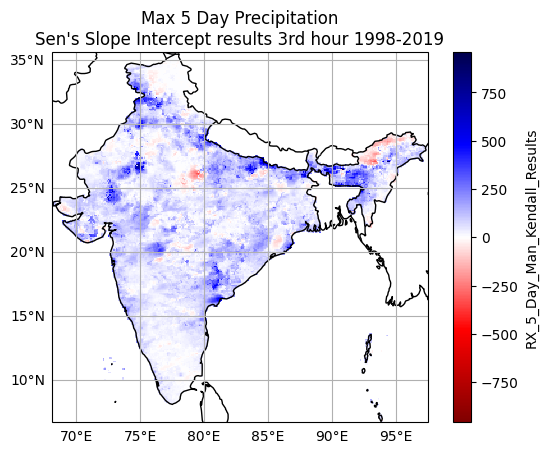

In [15]:
plot_data,intercept_plot = SenSlope(max_5_day_prec)
PlotGraph(plot_data,test="Sen\'s Slope",hour="3rd")
PlotGraph(intercept_plot,test="Sen\'s Slope Intercept",hour="3rd")

## 6th Hour

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xarray/coding/times.py:724: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xarray/core/indexing.py:557: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  array = array.get_duck_array()
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xarray/coding/times.py:724: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/Lib

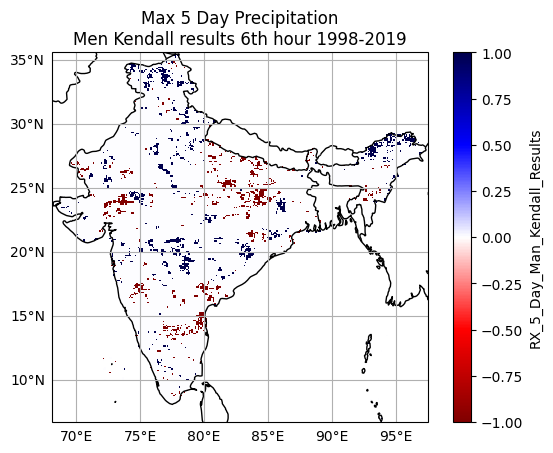

In [16]:
max_5_day_prec = LoadData("06")
plot_data = ManKendallTest(max_5_day_prec)
PlotGraph(plot_data,hour="6th")

/Users/yuvrajsinhdilipsinhbodana/Library/Python/3.11/lib/python/site-packages/pymannkendall/pymannkendall.py:180: RuntimeWarning: All-NaN slice encountered
  slope = np.nanmedian(__sens_estimator(x))
/Users/yuvrajsinhdilipsinhbodana/Library/Python/3.11/lib/python/site-packages/pymannkendall/pymannkendall.py:181: RuntimeWarning: All-NaN slice encountered
  intercept = np.nanmedian(x) - np.median(np.arange(n)[~np.isnan(x.flatten())]) * slope  # or median(x) - (n-1)/2 *slope
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:451: UserWarni

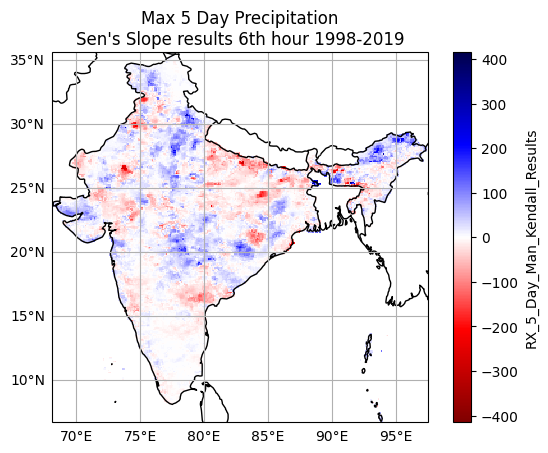

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


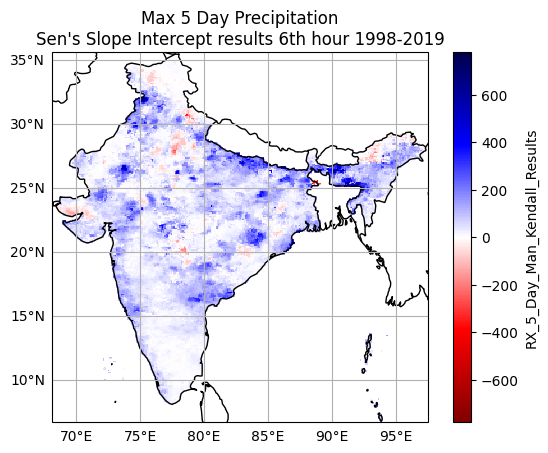

In [17]:
plot_data,intercept_plot = SenSlope(max_5_day_prec)
PlotGraph(plot_data,test="Sen\'s Slope",hour="6th")
PlotGraph(intercept_plot,test="Sen\'s Slope Intercept",hour="6th")

## 9th Hour

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xarray/coding/times.py:724: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xarray/core/indexing.py:557: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  array = array.get_duck_array()
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xarray/coding/times.py:724: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/Lib

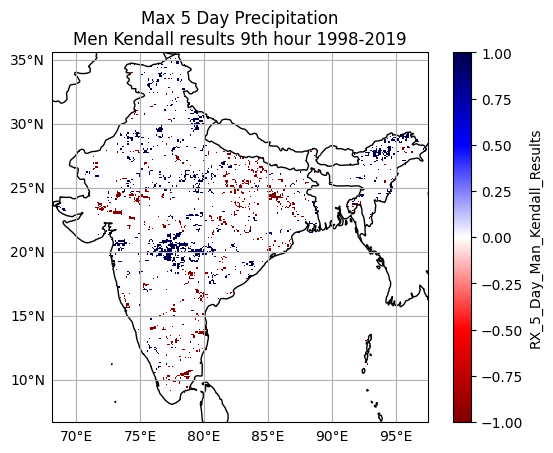

In [18]:
max_5_day_prec = LoadData("09")
plot_data = ManKendallTest(max_5_day_prec)
PlotGraph(plot_data,hour="9th")

/Users/yuvrajsinhdilipsinhbodana/Library/Python/3.11/lib/python/site-packages/pymannkendall/pymannkendall.py:180: RuntimeWarning: All-NaN slice encountered
  slope = np.nanmedian(__sens_estimator(x))
/Users/yuvrajsinhdilipsinhbodana/Library/Python/3.11/lib/python/site-packages/pymannkendall/pymannkendall.py:181: RuntimeWarning: All-NaN slice encountered
  intercept = np.nanmedian(x) - np.median(np.arange(n)[~np.isnan(x.flatten())]) * slope  # or median(x) - (n-1)/2 *slope
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:451: UserWarni

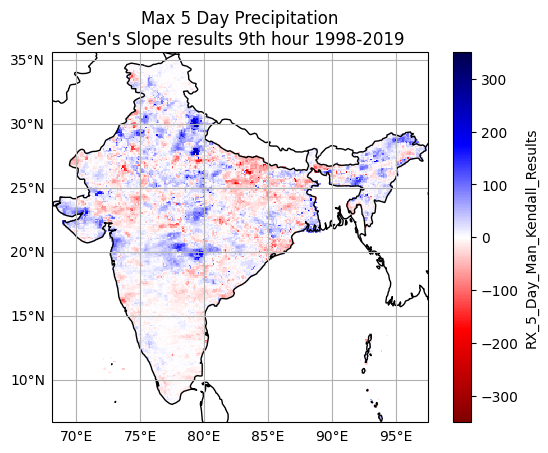

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


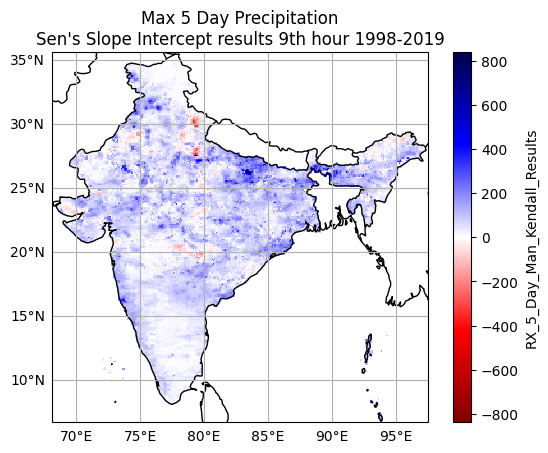

In [19]:
plot_data,intercept_plot = SenSlope(max_5_day_prec)
PlotGraph(plot_data,test="Sen\'s Slope",hour="9th")
PlotGraph(intercept_plot,test="Sen\'s Slope Intercept",hour="9th")

## 12th Hour

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xarray/coding/times.py:724: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xarray/core/indexing.py:557: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  array = array.get_duck_array()
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xarray/coding/times.py:724: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/Lib

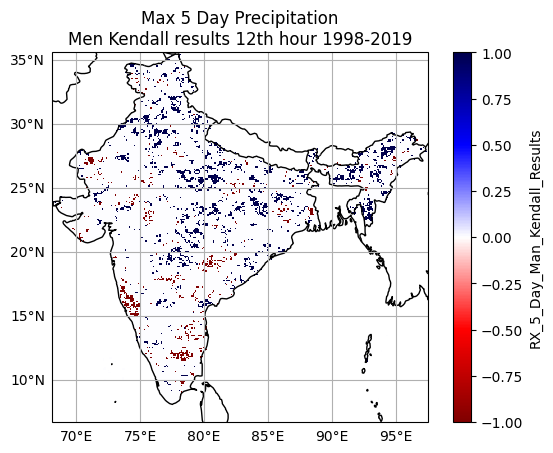

In [20]:
max_5_day_prec = LoadData("12")
plot_data = ManKendallTest(max_5_day_prec)
PlotGraph(plot_data,hour="12th")

/Users/yuvrajsinhdilipsinhbodana/Library/Python/3.11/lib/python/site-packages/pymannkendall/pymannkendall.py:180: RuntimeWarning: All-NaN slice encountered
  slope = np.nanmedian(__sens_estimator(x))
/Users/yuvrajsinhdilipsinhbodana/Library/Python/3.11/lib/python/site-packages/pymannkendall/pymannkendall.py:181: RuntimeWarning: All-NaN slice encountered
  intercept = np.nanmedian(x) - np.median(np.arange(n)[~np.isnan(x.flatten())]) * slope  # or median(x) - (n-1)/2 *slope
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:451: UserWarni

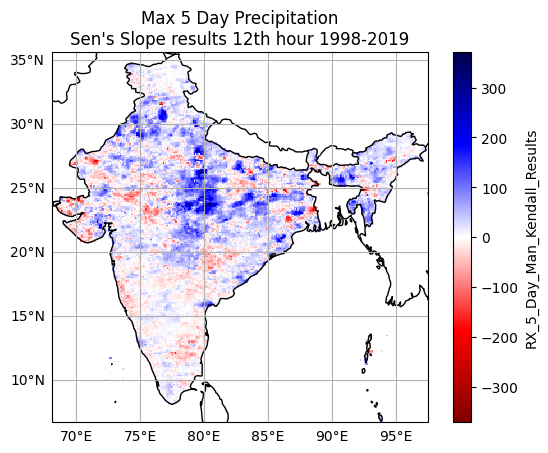

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


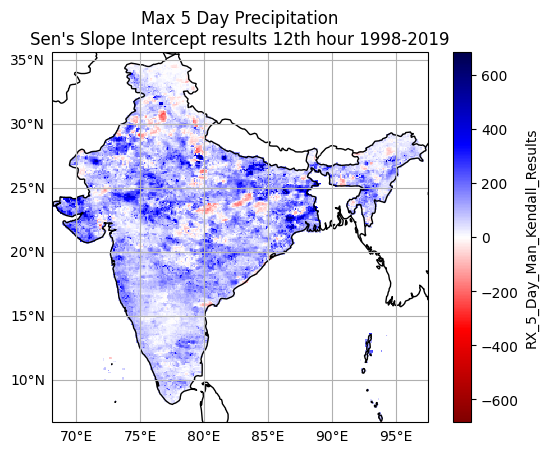

In [22]:
plot_data,intercept_plot = SenSlope(max_5_day_prec)
PlotGraph(plot_data,test="Sen\'s Slope",hour="12th")
PlotGraph(intercept_plot,test="Sen\'s Slope Intercept",hour="12th")

## 15th Hour

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xarray/coding/times.py:724: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xarray/core/indexing.py:557: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  array = array.get_duck_array()
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xarray/coding/times.py:724: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/Lib

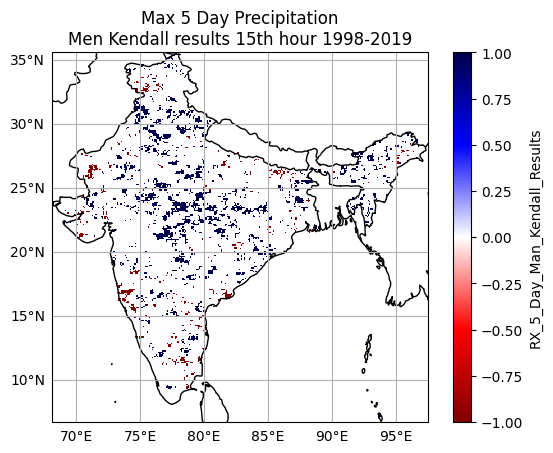

In [23]:
max_5_day_prec = LoadData("15")
plot_data = ManKendallTest(max_5_day_prec)
PlotGraph(plot_data,hour="15th")

/Users/yuvrajsinhdilipsinhbodana/Library/Python/3.11/lib/python/site-packages/pymannkendall/pymannkendall.py:180: RuntimeWarning: All-NaN slice encountered
  slope = np.nanmedian(__sens_estimator(x))
/Users/yuvrajsinhdilipsinhbodana/Library/Python/3.11/lib/python/site-packages/pymannkendall/pymannkendall.py:181: RuntimeWarning: All-NaN slice encountered
  intercept = np.nanmedian(x) - np.median(np.arange(n)[~np.isnan(x.flatten())]) * slope  # or median(x) - (n-1)/2 *slope
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:451: UserWarni

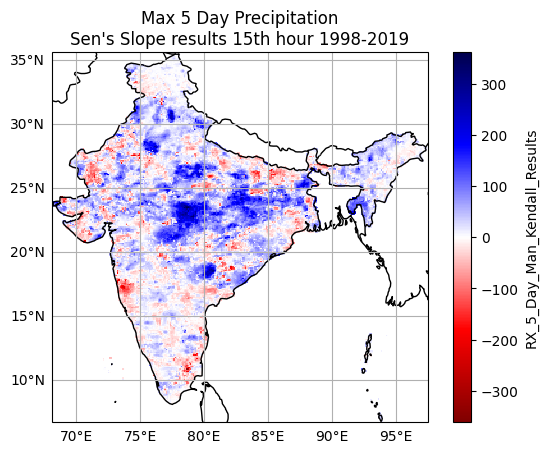

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


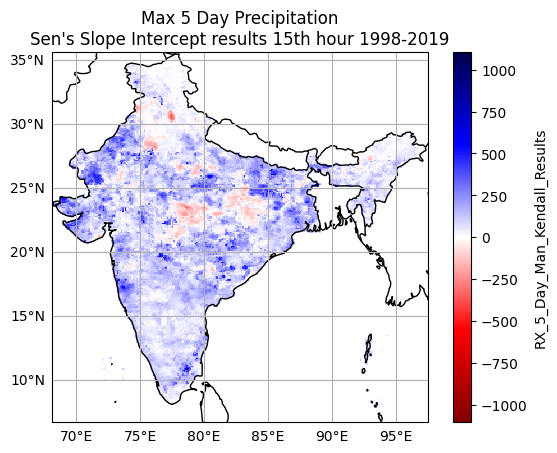

In [24]:
plot_data,intercept_plot = SenSlope(max_5_day_prec)
PlotGraph(plot_data,test="Sen\'s Slope",hour="15th")
PlotGraph(intercept_plot,test="Sen\'s Slope Intercept",hour="15th")

## 18th Hour

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xarray/coding/times.py:724: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xarray/core/indexing.py:557: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  array = array.get_duck_array()
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xarray/coding/times.py:724: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/Lib

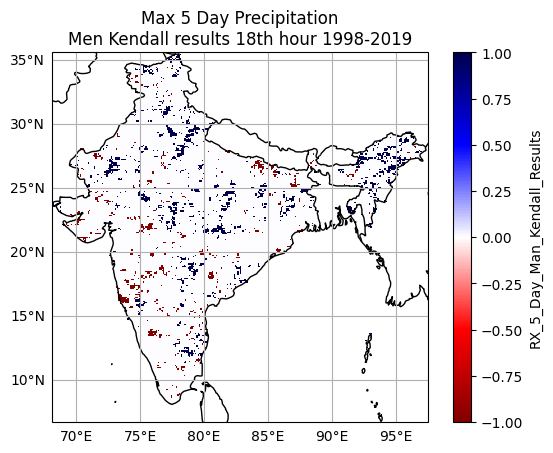

In [25]:
max_5_day_prec = LoadData("18")
plot_data = ManKendallTest(max_5_day_prec)
PlotGraph(plot_data,hour="18th")

/Users/yuvrajsinhdilipsinhbodana/Library/Python/3.11/lib/python/site-packages/pymannkendall/pymannkendall.py:180: RuntimeWarning: All-NaN slice encountered
  slope = np.nanmedian(__sens_estimator(x))
/Users/yuvrajsinhdilipsinhbodana/Library/Python/3.11/lib/python/site-packages/pymannkendall/pymannkendall.py:181: RuntimeWarning: All-NaN slice encountered
  intercept = np.nanmedian(x) - np.median(np.arange(n)[~np.isnan(x.flatten())]) * slope  # or median(x) - (n-1)/2 *slope
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:451: UserWarni

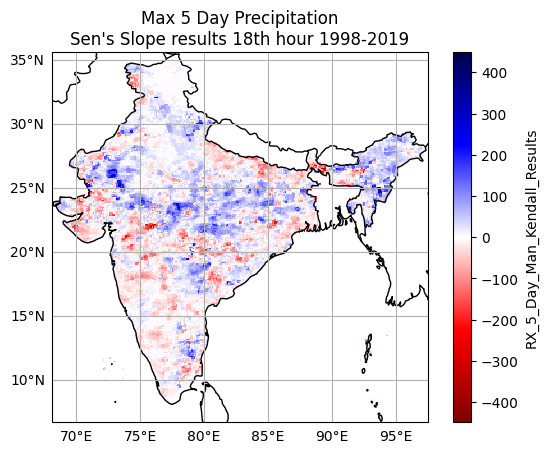

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


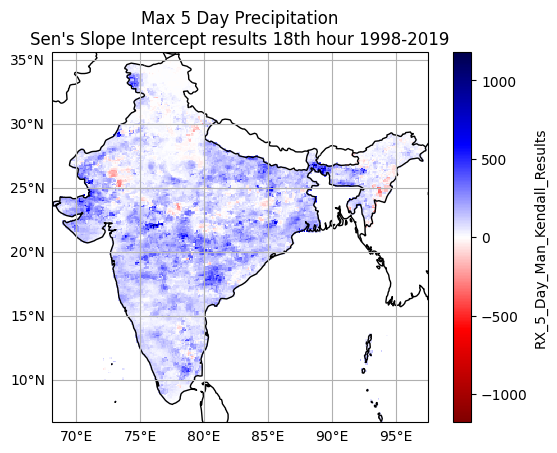

In [26]:
plot_data,intercept_plot = SenSlope(max_5_day_prec)
PlotGraph(plot_data,test="Sen\'s Slope",hour="18th")
PlotGraph(intercept_plot,test="Sen\'s Slope Intercept",hour="18th")

## 21st Hour

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


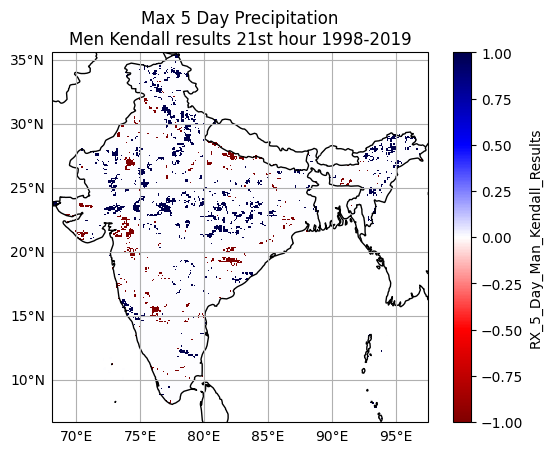

In [28]:
max_5_day_prec = LoadData("21")
plot_data = ManKendallTest(max_5_day_prec)
PlotGraph(plot_data,hour="21st")

/Users/yuvrajsinhdilipsinhbodana/Library/Python/3.11/lib/python/site-packages/pymannkendall/pymannkendall.py:180: RuntimeWarning: All-NaN slice encountered
  slope = np.nanmedian(__sens_estimator(x))
/Users/yuvrajsinhdilipsinhbodana/Library/Python/3.11/lib/python/site-packages/pymannkendall/pymannkendall.py:181: RuntimeWarning: All-NaN slice encountered
  intercept = np.nanmedian(x) - np.median(np.arange(n)[~np.isnan(x.flatten())]) * slope  # or median(x) - (n-1)/2 *slope
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:451: UserWarni

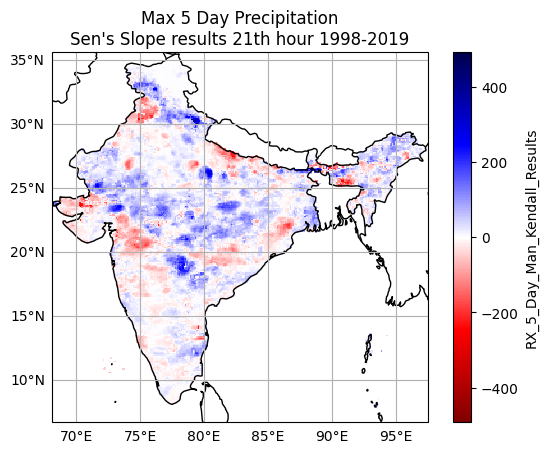

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


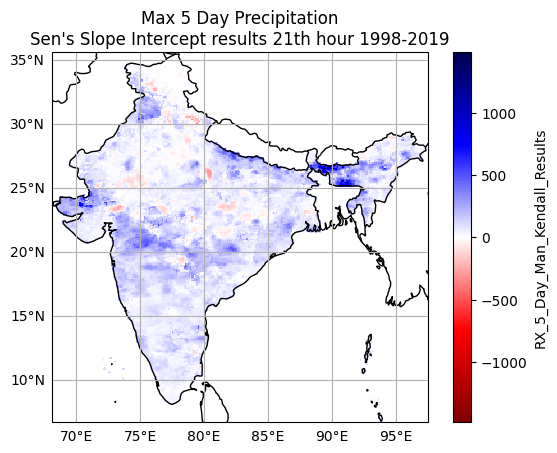

In [29]:
plot_data,intercept_plot = SenSlope(max_5_day_prec)
PlotGraph(plot_data,test="Sen\'s Slope",hour="21th")
PlotGraph(intercept_plot,test="Sen\'s Slope Intercept",hour="21th")

## Grid Plot

In [10]:
hour = ["00","03","06","09","12","15","18","21"]
for h in hour:
    max_5_day_prec = LoadData(h)
    plot_data,intercept_plot,count = SenSlope(max_5_day_prec)
    CountGrids(count)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xarray/coding/times.py:724: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xarray/core/indexing.py:557: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  array = array.get_duck_array()
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xarray/coding/times.py:724: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/Lib

p=1953,n=-1917,nn=9047,o=1006
Total = 13923


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xarray/coding/times.py:724: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xarray/core/indexing.py:557: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  array = array.get_duck_array()
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xarray/coding/times.py:724: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/Lib

p=2104,n=-1528,nn=9047,o=1244
Total = 13923


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xarray/coding/times.py:724: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xarray/core/indexing.py:557: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  array = array.get_duck_array()
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xarray/coding/times.py:724: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/Lib

p=2666,n=-1546,nn=9047,o=664
Total = 13923


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xarray/coding/times.py:724: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xarray/core/indexing.py:557: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  array = array.get_duck_array()
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xarray/coding/times.py:724: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/Lib

p=2917,n=-1723,nn=9047,o=236
Total = 13923


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xarray/coding/times.py:724: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xarray/core/indexing.py:557: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  array = array.get_duck_array()
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xarray/coding/times.py:724: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/Lib

p=1878,n=-2705,nn=9047,o=293
Total = 13923


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xarray/coding/times.py:724: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xarray/core/indexing.py:557: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  array = array.get_duck_array()
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xarray/coding/times.py:724: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/Lib

p=2369,n=-2142,nn=9047,o=365
Total = 13923


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xarray/coding/times.py:724: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xarray/core/indexing.py:557: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  array = array.get_duck_array()
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xarray/coding/times.py:724: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/Lib

p=2892,n=-1803,nn=9047,o=181
Total = 13923


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xarray/coding/times.py:724: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xarray/core/indexing.py:557: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  array = array.get_duck_array()
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xarray/coding/times.py:724: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/Lib

p=2759,n=-1587,nn=9047,o=530
Total = 13923


In [11]:
increasing_count

[1953, 2104, 2666, 2917, 1878, 2369, 2892, 2759]

In [12]:
decreasing_count

[-1917, -1528, -1546, -1723, -2705, -2142, -1803, -1587]

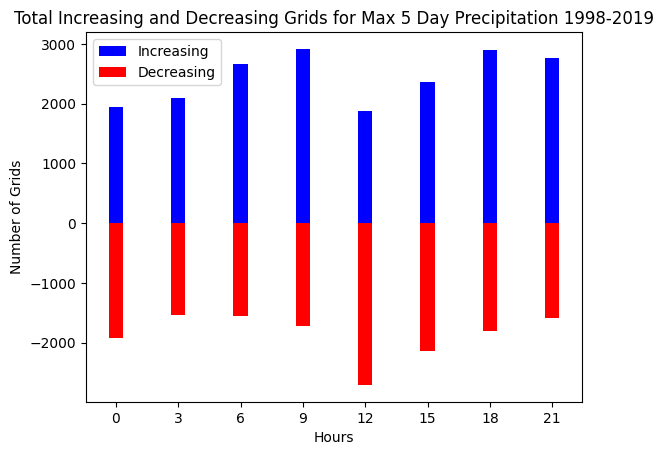

In [13]:
GridPlot(increasing_count,decreasing_count)

## Grid Plot for GPM

In [10]:
hour = ["00","03","06","09","12","15","18","21"]
for h in hour:
    max_5_day_prec = LoadData(h)
    plot_data,intercept_plot,count = SenSlope(max_5_day_prec)
    CountGrids(count)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xarray/coding/times.py:724: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xarray/core/indexing.py:557: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  array = array.get_duck_array()
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xarray/coding/times.py:724: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/Lib

p=16675,n=-12270,nn=56009,o=12
Total = 84966


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xarray/coding/times.py:724: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xarray/core/indexing.py:557: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  array = array.get_duck_array()
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xarray/coding/times.py:724: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/Lib

p=15995,n=-12962,nn=56009,o=0
Total = 84966


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xarray/coding/times.py:724: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xarray/core/indexing.py:557: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  array = array.get_duck_array()
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xarray/coding/times.py:724: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/Lib

p=15303,n=-13654,nn=56009,o=0
Total = 84966


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xarray/coding/times.py:724: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xarray/core/indexing.py:557: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  array = array.get_duck_array()
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xarray/coding/times.py:724: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/Lib

p=15504,n=-13453,nn=56009,o=0
Total = 84966


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xarray/coding/times.py:724: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xarray/core/indexing.py:557: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  array = array.get_duck_array()
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xarray/coding/times.py:724: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/Lib

p=18969,n=-9988,nn=56009,o=0
Total = 84966


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xarray/coding/times.py:724: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xarray/core/indexing.py:557: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  array = array.get_duck_array()
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xarray/coding/times.py:724: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/Lib

p=19281,n=-9676,nn=56009,o=0
Total = 84966


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xarray/coding/times.py:724: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xarray/core/indexing.py:557: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  array = array.get_duck_array()
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xarray/coding/times.py:724: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/Lib

p=16453,n=-12499,nn=56009,o=5
Total = 84966


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xarray/coding/times.py:724: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xarray/core/indexing.py:557: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  array = array.get_duck_array()
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xarray/coding/times.py:724: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/Lib

p=17398,n=-11559,nn=56009,o=0
Total = 84966


In [11]:
increasing_count

[16675, 15995, 15303, 15504, 18969, 19281, 16453, 17398]

In [12]:
decreasing_count

[-12270, -12962, -13654, -13453, -9988, -9676, -12499, -11559]

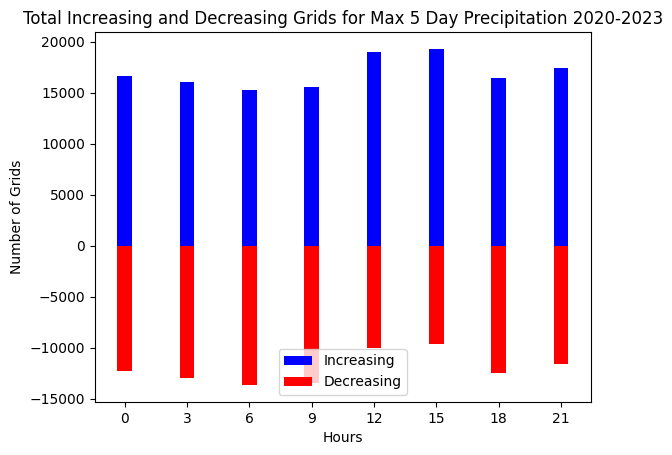

In [14]:
GridPlot(increasing_count,decreasing_count,year='2020-2023')